In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [ ]:
data = pd.read_csv('./OptionMetrics/options2223.csv', nrows=2_000_000)

C:\Users\User\AppData\Local\Temp\ipykernel_14608\3446521250.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./OptionMetrics/options2223.csv', nrows=2_000_000)


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data[data['date'] == '2022-01-03'].groupby('symbol').sum('volume')[['secid','volume']].sort_values('volume',ascending=False))

                      secid  volume
symbol                             
RUT 220318C2280000   102434     905
RUT 220121C2280000   102434     898
RUT 220121P2280000   102434     895
RUT 220318P2280000   102434     889
RUT 220218P2240000   102434     812
RUT 220121P2240000   102434     763
RUT 220218C2380000   102434     706
RUTW 220107C2340000  102434     685
RUT 220318P2200000   102434     669
RUTW 220103C2270000  102434     593
RUTW 220107C2335000  102434     555
RUT 220318P2270000   102434     521
RUTW 220107P2080000  102434     503
RUT 220318C2270000   102434     495
RUTW 220429C2350000  102434     472
RUTW 220103P2265000  102434     426
RUTW 220103P2240000  102434     426
RUTW 220128P2000000  102434     404
RUTW 220128P1990000  102434     375
RUTW 220128C2260000  102434     362
RUTW 220107P1850000  102434     360
RUTW 220331P2020000  102434     337
RUTW 220331P2010000  102434     337
RUTW 220103C2275000  102434     337
RUTW 220103P2245000  102434     314
RUTW 220128P2025000  102434 

In [ ]:
print(data.head())

    secid        date              symbol      exdate last_date cp_flag  \
0  100219  2022-01-03  RUI 220121C1750000  2022-01-21       NaN       C   
1  100219  2022-01-03  RUI 220121C1775000  2022-01-21       NaN       C   
2  100219  2022-01-03  RUI 220121C1800000  2022-01-21       NaN       C   
3  100219  2022-01-03  RUI 220121C1825000  2022-01-21       NaN       C   
4  100219  2022-01-03  RUI 220121C1850000  2022-01-21       NaN       C   

   strike_price  best_bid  best_offer  volume  open_interest  impl_volatility  \
0       1750000     895.5       919.5       0              0              NaN   
1       1775000     870.5       894.5       0              0              NaN   
2       1800000     845.5       869.5       0              0              NaN   
3       1825000     820.5       844.5       0              0              NaN   
4       1850000     795.5       819.5       0              0              NaN   

    optionid  contract_size  forward_price expiry_indicator  i

In [ ]:
sample = data[(data['secid']==102434) & (data['date']=='2022-01-03') & (data['exdate'] =='2022-05-31') & (data['cp_flag']=='C')]

nums  = data[(data['secid']==102434) & (data['date']=='2022-01-03') & (data['cp_flag']=='C')]

In [ ]:
nums.groupby('exdate').count()

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(nums.groupby(['expiry_indicator', 'exdate'])['volume'].count())

expiry_indicator  exdate    
m                 2022-01-31    115
                  2022-02-28    119
                  2022-03-31    121
                  2022-04-29    119
                  2022-05-31    203
                  2022-06-30    125
                  2022-09-30    119
                  2022-12-30    120
w                 2022-01-03    177
                  2022-01-05    201
                  2022-01-07    319
                  2022-01-10    177
                  2022-01-12    181
                  2022-01-14    309
                  2022-01-18    182
                  2022-01-28    311
                  2022-02-04    302
                  2022-02-11    308
Name: volume, dtype: int64


In [257]:
sample2 = data[(data['secid']==102434) & (data['date']=='2022-01-03') & (data['exdate'] =='2022-01-07') & (data['cp_flag']=='C')]
sample3 = data[(data['secid']==100219) & (data['date']=='2022-01-03') & (data['exdate'] =='2022-03-18') & (data['cp_flag']=='C')]


In [258]:
sample3 = sample2
print(sample2)

         secid        date               symbol      exdate   last_date  \
707627  102434  2022-01-03  RUTW 220107C1265000  2022-01-07         NaN   
707628  102434  2022-01-03  RUTW 220107C1270000  2022-01-07         NaN   
707629  102434  2022-01-03  RUTW 220107C1275000  2022-01-07         NaN   
707630  102434  2022-01-03  RUTW 220107C1280000  2022-01-07         NaN   
707631  102434  2022-01-03  RUTW 220107C1285000  2022-01-07         NaN   
...        ...         ...                  ...         ...         ...   
707941  102434  2022-01-03  RUTW 220107C2835000  2022-01-07         NaN   
707942  102434  2022-01-03  RUTW 220107C2840000  2022-01-07         NaN   
707943  102434  2022-01-03  RUTW 220107C2845000  2022-01-07         NaN   
707944  102434  2022-01-03  RUTW 220107C2850000  2022-01-07  2021-11-30   
707945  102434  2022-01-03  RUTW 220107C2855000  2022-01-07         NaN   

       cp_flag  strike_price  best_bid  best_offer  volume  open_interest  \
707627       C       1

In [259]:
forwards = pd.read_csv('./OptionMetrics/forwards2223.csv')

In [260]:
forwards[(forwards['secid']==102434) & (forwards['date']=='2022-01-03')]

,secid,date,expiration,ForwardPrice,ticker
371825,102434,2022-01-03,2022-01-03,2272.557100,RUT
371826,102434,2022-01-03,2022-01-05,2272.466713,RUT
371827,102434,2022-01-03,2022-01-07,2272.376330,RUT
371828,102434,2022-01-03,2022-01-10,2272.240762,RUT
371829,102434,2022-01-03,2022-01-12,2272.150388,RUT
371830,102434,2022-01-03,2022-01-14,2272.060219,RUT
371831,102434,2022-01-03,2022-01-18,2271.880662,RUT
371832,102434,2022-01-03,2022-01-21,2271.791108,RUT
371833,102434,2022-01-03,2022-01-28,2271.434394,RUT
371834,102434,2022-01-03,2022-01-31,2271.301245,RUT


In [261]:
forwards[(forwards['secid']==102434) & (forwards['date']=='2022-01-03') & (forwards['expiration'] == '2022-05-31')]

,secid,date,expiration,ForwardPrice,ticker
371842,102434,2022-01-03,2022-05-31,2266.349134,RUT


In [14]:
#f2
forwards[(forwards['secid']==102434) & (forwards['date']=='2022-01-03') & (forwards['expiration'] == '2022-12-30')]

,secid,date,expiration,ForwardPrice,ticker
371850,102434,2022-01-03,2022-12-30,2260.183187,RUT


In [15]:
securities = pd.read_csv('./OptionMetrics/securities2223.csv', nrows=10_000)

In [16]:
securities[(securities['secid']==100219) & (securities['date']=='2022-01-03')]

,secid,date,ticker,sic,index_flag,exchange_d,low,high,open,close,volume
6953,100219,2022-01-03,RUI,9999.0,1,32768,2640.25,2660.95,2645.68,2660.78,0


In [17]:
rates = pd.read_csv('./OptionMetrics/rates2223.csv', nrows=10_000)

In [18]:
rates.head()

,date,days,rate
0,2022-01-03,10,0.518382
1,2022-01-03,30,0.524269
2,2022-01-03,60,0.534101
3,2022-01-03,91,0.545490
4,2022-01-03,122,0.558093


In [19]:
rates[(rates['date'] == '2022-01-03') & (rates['days']==30)]['rate'] / 100
r = (rates[(rates['date'] == '2022-01-03') & (rates['days']==30)]['rate'] / 100).iloc[0]
r2 = 0.0053
r3 = 0.0056

In [20]:
import numpy as np
print(2662.556214 * np.exp(-r * 45 / 365))
print(2445 * np.exp(r * 45/365.0))

2660.8358027802246
2446.580858701599


In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(sample3[['exdate','strike_price','impl_volatility', 'best_bid', 'best_offer']])

            exdate  strike_price  impl_volatility  best_bid  best_offer
713647  2022-12-30       1100000         0.395676    1112.3      1208.3
713648  2022-12-30       1150000         0.386990    1064.3      1160.3
713649  2022-12-30       1200000         0.380048    1016.8      1112.8
713650  2022-12-30       1250000         0.379388     970.8      1066.8
713651  2022-12-30       1300000         0.364597     922.5      1018.5
713652  2022-12-30       1350000         0.367316     878.4       974.4
713653  2022-12-30       1400000         0.350645     830.0       926.0
713654  2022-12-30       1450000         0.352011     787.0       883.0
713655  2022-12-30       1500000         0.338588     740.0       836.0
713656  2022-12-30       1550000         0.333593     696.3       792.3
713657  2022-12-30       1600000         0.324176     651.5       747.5
713658  2022-12-30       1650000         0.311079     605.5       701.5
713659  2022-12-30       1700000         0.308132     564.7     

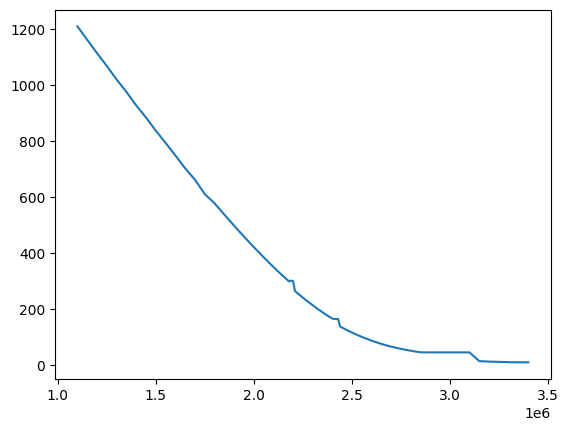

In [22]:
plt.plot(sample3['strike_price'],sample3['best_offer'])

In [23]:
sample=sample

In [24]:
print(securities.head())

   secid        date ticker     sic  index_flag  exchange_d     low     high  \
0   5139  2022-12-27    CAE  3690.0           0          17  18.930  19.1600   
1   5139  2022-12-30    CAE  3690.0           0          17  19.170  19.6400   
2   5139  2022-12-29    CAE  3690.0           0          17  18.810  19.4515   
3   5139  2022-12-28    CAE  3690.0           0          17  18.735  19.2600   
4   5139  2022-12-23    CAE  3690.0           0          17  18.900  19.1500   

    open  close  volume  
0  19.10  19.15   85882  
1  19.17  19.34  285651  
2  18.93  19.37  165575  
3  18.95  18.78  159200  
4  19.10  19.10  115037  


In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(sample[['strike_price', 'best_bid','date','exdate']])

        strike_price  best_bid        date      exdate
712753       1150000   1114.90  2022-01-03  2022-05-31
712754       1200000   1065.70  2022-01-03  2022-05-31
712755       1250000   1016.60  2022-01-03  2022-05-31
712756       1300000    967.60  2022-01-03  2022-05-31
712757       1350000    918.70  2022-01-03  2022-05-31
712758       1400000    870.00  2022-01-03  2022-05-31
712759       1450000    821.50  2022-01-03  2022-05-31
712760       1500000    773.10  2022-01-03  2022-05-31
712761       1550000    725.00  2022-01-03  2022-05-31
712762       1600000    677.20  2022-01-03  2022-05-31
712763       1650000    629.70  2022-01-03  2022-05-31
712764       1700000    582.70  2022-01-03  2022-05-31
712765       1750000    536.10  2022-01-03  2022-05-31
712766       1780000    508.50  2022-01-03  2022-05-31
712767       1785000    503.90  2022-01-03  2022-05-31
712768       1790000    499.30  2022-01-03  2022-05-31
712769       1795000    494.70  2022-01-03  2022-05-31
712770    

In [26]:
import pipeline
import importlib
from py_vollib.black_scholes.implied_volatility import implied_volatility

importlib.reload(pipeline)
R = r2
S = 2640.25 # We take low price to avoid impl vol calc issues
S = 2640.25
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
def implied_vol_catch(P, S, k, T, r):
    try:
        vol = implied_volatility(P, S, k, T, r, 'c')
    except:
        return 0
    return vol
processed = sample[['strike_price', 'best_bid', 'best_offer', 'impl_volatility']]
processed['strike_price'] = processed['strike_price'] / 1000
processed['vol_high'] = processed.apply(lambda x: implied_vol_catch(x['best_offer'], S, x['strike_price'], T, R), axis=1)
processed['vol_low'] = processed.apply(lambda x: implied_vol_catch(x['best_bid'], S, x['strike_price'], T, R), axis=1)
processed['vol_mid'] = (processed['vol_high'] + processed['vol_low']) / 2

C:\Users\User\AppData\Local\Temp\ipykernel_14608\3208580283.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['strike_price'] = processed['strike_price'] / 1000
C:\Users\User\AppData\Local\Temp\ipykernel_14608\3208580283.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['vol_high'] = processed.apply(lambda x: implied_vol_catch(x['best_offer'], S, x['strike_price'], T, R), axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_14608\3208580283.py:22: SettingWithCopyWarning: 
A value is 

In [262]:
import pipeline
import importlib
from py_vollib.black_scholes.implied_volatility import implied_volatility

importlib.reload(pipeline)
R = 0.00518
F = 2272.376330 # for ID 102434, Exp date 07/01/2022
T = 4 / 365.0
S = F * np.exp(-R * T)
def implied_vol_catch(P, S, k, T, r):
    try:
        vol = implied_volatility(P, S, k, T, r, 'c')
    except:
        return 0
    return vol
processed2 = sample2[['strike_price', 'best_bid', 'best_offer', 'impl_volatility']]
processed2['strike_price'] = processed2['strike_price'] / 1000
processed2['vol_high'] = processed2.apply(lambda x: implied_vol_catch(x['best_offer'], S, x['strike_price'], T, R), axis=1)
processed2['vol_low'] = processed2.apply(lambda x: implied_vol_catch(x['best_bid'], S, x['strike_price'], T, R), axis=1)
processed2['vol_mid'] = (processed2['vol_high'] + processed2['vol_low']) / 2

C:\Users\User\AppData\Local\Temp\ipykernel_14608\1751140811.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed2['strike_price'] = processed2['strike_price'] / 1000
C:\Users\User\AppData\Local\Temp\ipykernel_14608\1751140811.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed2['vol_high'] = processed2.apply(lambda x: implied_vol_catch(x['best_offer'], S, x['strike_price'], T, R), axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_14608\1751140811.py:19: SettingWithCopyWarning: 
A value

In [263]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    display(processed)

,strike_price,best_bid,best_offer,impl_volatility,vol_high,vol_low,vol_mid
712753,1150.0,1114.90,1118.50,0.497858,0.524338,0.432651,0.478494
712754,1200.0,1065.70,1069.30,0.484312,0.505587,0.431583,0.468585
712755,1250.0,1016.60,1020.20,0.470510,0.487543,0.426303,0.456923
712756,1300.0,967.60,971.20,0.456367,0.469955,0.418380,0.444168
712757,1350.0,918.70,922.30,0.441848,0.452639,0.408614,0.430626
712758,1400.0,870.00,873.60,0.428009,0.436380,0.398690,0.417535
712759,1450.0,821.50,825.00,0.413965,0.419950,0.388319,0.404134
712760,1500.0,773.10,776.60,0.399613,0.404034,0.376498,0.390266
712761,1550.0,725.00,728.50,0.385942,0.389007,0.365020,0.377014
712762,1600.0,677.20,680.60,0.372217,0.373887,0.353486,0.363686


In [264]:
import matplotlib.pyplot as plt
import numpy as np

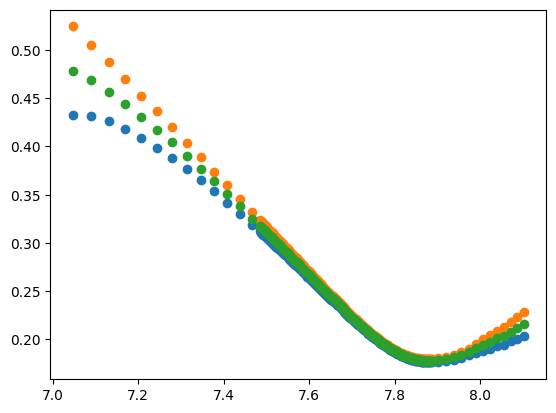

In [265]:
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_low'])
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_high'])
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_mid'])

In [266]:
import smilecorrector as smilenet
importlib.reload(smilenet)
import torch
# For first try, we pass our boundaries as each strike price

boundaries = processed['strike_price'].apply(np.log).to_numpy()
ind = np.array([i for i in range(0,boundaries.shape[0],20)])
boundaries = boundaries[ind]
strikes = boundaries.copy()
# boundaries = np.hstack([np.array([(1 - i/10) * hi + i/10 * lo for i in range(11)]) for hi, lo in zip(boundaries[:-1], boundaries[1:])])
mids = processed['vol_mid'].to_numpy()[ind]
print(' Boundary shape' , boundaries.shape)
print('Mid shape', mids.shape)
print('Strike shape', strikes.shape)
model = smilenet.SmileNet(boundaries, strikes, mids)

 Boundary shape (11,)
Mid shape (11,)
Strike shape (11,)
Strike knots shape 11
System shape: (27, 40) With 9 knots
(40, 13) (27, 40) (40, 1)
(40, 1)
(40, 13)
(13, 1)
torch.Size([13])


In [267]:
datum = torch.tensor(np.vstack([processed['vol_high'].to_numpy()[ind].reshape(-1,1), processed['vol_low'].to_numpy()[ind].reshape(-1,1)])).double()
print('Datum shape: ', datum.shape)
print(model.xstar.shape)
print(model.blackbox[-1])
print(model.translate.shape)
res1 = model.forward(datum.T.double())
res1 = res1.reshape(-1)
# print(res1.shape)
# print(res1)

Datum shape:  torch.Size([22, 1])
(40, 1)
Linear(in_features=44, out_features=13, bias=True)
torch.Size([13, 40])
With remaining arb: -0.0


In [268]:
print(len(boundaries))
boundary_spaces = [np.linspace(x,y) for x, y in zip(boundaries[:-1],boundaries[1:])]
resn = res1.detach().numpy()
print(resn.shape)
polys = [np.polynomial.polynomial.Polynomial(list(reversed(resn[4*i:4*i+4]))) for i in range(resn.shape[0]//4)]
print(len(polys), len(boundary_spaces)) # Why am I throwing away the first polynomial
polys = polys[:]
print(len(polys), len(boundary_spaces))
plot_points = np.hstack([poly(space) for poly, space in zip(polys, boundary_spaces)])
print(len(plot_points))
points = np.hstack(boundary_spaces)
print(len(points))

11
(40,)
10 10
10 10
500
500


In [269]:
print(boundaries[0])
print(np.log(processed['strike_price'].to_numpy()[0]), processed['vol_mid'].to_numpy()[0])
print(resn[0:4])

7.047517221357296
7.047517221357296 0.47849416334538936
[ -0.0759262    1.54410247 -10.7779175   26.32098824]


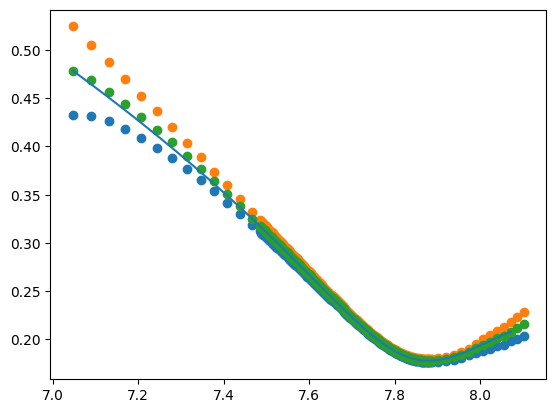

In [270]:
plt.plot(points, plot_points)
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_low'])
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_high'])
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_mid'])

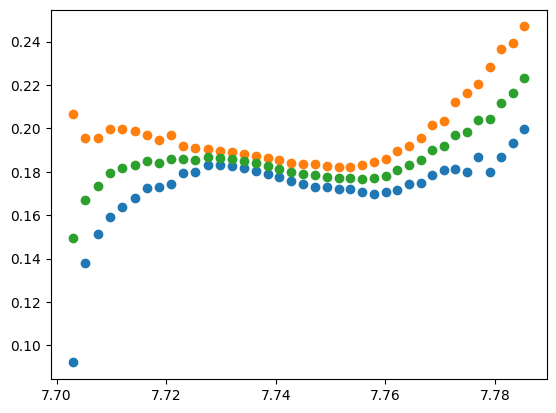

In [273]:
processed2 = processed2[processed2['vol_low'] != 0]
plt.scatter(processed2['strike_price'].apply(np.log), processed2['vol_low'])
plt.scatter(processed2['strike_price'].apply(np.log), processed2['vol_high'])
plt.scatter(processed2['strike_price'].apply(np.log), processed2['vol_mid'])

In [38]:
import smilecorrector as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
boundaries = processed['strike_price'].apply(np.log).to_numpy()
ind = np.array([i for i in range(0,boundaries.shape[0],3)])
boundaries = boundaries[ind]
strikes = boundaries.copy()
log_strikes = torch.tensor(processed['strike_price'].apply(np.log).to_numpy())
mids = np.sqrt((processed['vol_mid'].to_numpy() + processed['vol_mid'].to_numpy())/2)[ind]
print(' Boundary shape' , boundaries.shape)
print('Mid shape', mids.shape)
print('Strike shape', strikes.shape)
model = smilenet.SmileNet(boundaries, log_strikes, mids)
datum = torch.tensor(np.vstack([np.sqrt(processed['vol_high'].to_numpy().reshape(-1,1)), np.sqrt(processed['vol_low'].to_numpy().reshape(-1,1))])).double()
model.train(datum.T.double(), log_strikes)

 Boundary shape (68,)
Mid shape (68,)
Strike shape (68,)
Strike knots shape 68
System shape: (198, 268) With 66 knots
(268, 70) (198, 268) (268, 1)
(268, 1)
(268, 70)
(70, 1)
torch.Size([70])
Epoch: 0
With remaining arb: -0.0


d:\Project\smilecorrector.py:390: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ctx.save_for_backward(coeffs, torch.tensor(x))
d:\Project\smilecorrector.py:394: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(poly(x))


Mid loss 9.585041730618696e-05
Loss: tensor(9.5850e-05, grad_fn=<DivBackward0>)
Epoch: 1


KeyboardInterrupt: 

With remaining arb: 1.1102230246251565e-08
42
(164,)
41 41
41 41
2050
2050


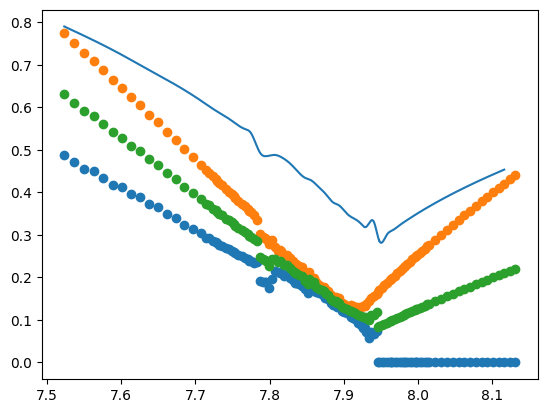

In [ ]:
res1 = model.forward(datum.T.double())
res1 = res1.reshape(-1)

print(len(boundaries))
boundary_spaces = [np.linspace(x,y) for x, y in zip(boundaries[:-1],boundaries[1:])]
resn = res1.detach().numpy()
print(resn.shape)
polys = [np.polynomial.polynomial.Polynomial(list(reversed(resn[4*i:4*i+4]))) for i in range(resn.shape[0]//4)]
print(len(polys), len(boundary_spaces)) # Why am I throwing away the first polynomial
polys = polys[:]
print(len(polys), len(boundary_spaces))
plot_points = np.hstack([poly(space) for poly, space in zip(polys, boundary_spaces)])
print(len(plot_points))
points = np.hstack(boundary_spaces)
print(len(points))
plt.plot(points, plot_points)
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_low'])
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_high'])
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_mid'])

In [ ]:
import datetime
importlib.reload(pipeline)
dts = lambda x: datetime.datetime.strftime(x, "%Y-%m-%d")
std = lambda x: datetime.datetime.strptime(x, "%Y-%m-%d")
dt100219 = []
d = std("2022-01-03")
date_end = std("2022-01-12")
dt = datetime.timedelta(days=1)
# while d <= date_end:
data = data[data['best_bid'] != 0]
counts = data[(data['date'] == dts(d+ 2 *dt)) & (data['cp_flag'] == 'C')].groupby('exdate',as_index=False).count()
for i in counts[counts['secid'] > 100]['exdate']:
    T = (std(i) - d).days / 365
    R = 0.0053 # Arb for now
    S = securities[(securities['date'] == dts(d)) & (securities['secid']==100219)]['low'].iloc[0]
    data_in = data[(data['date'] == dts(d+ 2 *dt)) & (data['cp_flag'] == 'C') & (data['exdate'] == i)].sample(100)
    print(data_in)
    print(S, T, R)
    dt100219 += [pipeline.get_datum(data_in,S, T, R)]
    d += dt
    

       secid        date              symbol      exdate last_date cp_flag  \
3397  100219  2022-01-05  RUI 220318C2280000  2022-03-18       NaN       C   
3434  100219  2022-01-05  RUI 220318C2650000  2022-03-18       NaN       C   
3366  100219  2022-01-05  RUI 220318C2025000  2022-03-18       NaN       C   
3362  100219  2022-01-05  RUI 220318C1990000  2022-03-18       NaN       C   
3396  100219  2022-01-05  RUI 220318C2275000  2022-03-18       NaN       C   
...      ...         ...                 ...         ...       ...     ...   
3421  100219  2022-01-05  RUI 220318C2480000  2022-03-18       NaN       C   
3376  100219  2022-01-05  RUI 220318C2110000  2022-03-18       NaN       C   
3356  100219  2022-01-05  RUI 220318C1940000  2022-03-18       NaN       C   
3419  100219  2022-01-05  RUI 220318C2470000  2022-03-18       NaN       C   
3392  100219  2022-01-05  RUI 220318C2240000  2022-03-18       NaN       C   

      strike_price  best_bid  best_offer  volume  open_interest

d:\Project\pipeline.py:7: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
d:\Project\pipeline.py:12: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d:\Project\pipeline.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = max(sigma + diff/vega, PRECISION) # f(x) / f'(x)
d:\Project\pipeline.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
d:\Project\pipeline.py:12: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d:\Project\pipeline.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

tensor([[       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [ 

d:\Project\pipeline.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['vol_high'] = processed.apply(lambda x: implied_vol(x['best_offer'], S, x['strike_price'], T, R), axis=1)
d:\Project\pipeline.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = max(sigma + diff/vega, PRECISION) # f(x) / f'(x)
d:\Project\pipeline.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
d:\Project\pipeline.py:12: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d:\Project\pipeline.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

tensor([[       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [ 

d:\Project\pipeline.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['vol_high'] = processed.apply(lambda x: implied_vol(x['best_offer'], S, x['strike_price'], T, R), axis=1)
d:\Project\pipeline.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = max(sigma + diff/vega, PRECISION) # f(x) / f'(x)
d:\Project\pipeline.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
d:\Project\pipeline.py:12: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d:\Project\pipeline.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

tensor([[       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [ 

ValueError: a must be greater than 0 unless no samples are taken

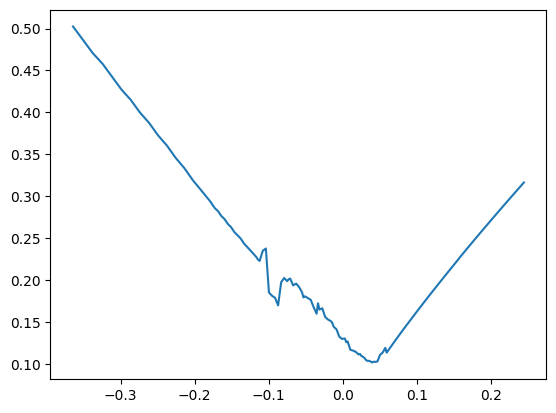

In [ ]:
plt.plot(log_strikes, torch.sqrt(mids))

1
torch.Size([45])
torch.Size([45])
tensor(0.0111) tensor(0.0122)
Mid shape torch.Size([45])
0
torch.Size([45]) torch.Size([45])
tensor([[ 0.1436],
        [ 0.1374],
        [ 0.1312],
        [ 0.1250],
        [ 0.1188],
        [ 0.1126],
        [ 0.1065],
        [ 0.1004],
        [ 0.0944],
        [ 0.0883],
        [ 0.0824],
        [ 0.0765],
        [ 0.0706],
        [ 0.0648],
        [ 0.0591],
        [ 0.0535],
        [ 0.0481],
        [ 0.0427],
        [ 0.0376],
        [ 0.0327],
        [ 0.0281],
        [ 0.0238],
        [ 0.0200],
        [ 0.0168],
        [ 0.0143],
        [ 0.0127],
        [ 0.0122],
        [ 0.0131],
        [ 0.0153],
        [ 0.0191],
        [ 0.0243],
        [ 0.0308],
        [ 0.0383],
        [ 0.0467],
        [ 0.0558],
        [ 0.0654],
        [ 0.0755],
        [ 0.0859],
        [ 0.0965],
        [ 0.1074],
        [ 0.1185],
        [ 0.1297],
        [ 0.1410],
        [ 0.1524],
        [ 0.1639],
        [ 0.1299

KeyboardInterrupt: 

Here we generate based on the svi curve:
 w(x) = a + b(c(x-m)+sqrt((x-m)^2 + k))
taking
a = -1.5
b = 1.3
c = -0.4
m = -0.3
k = 2

In [31]:
import importlib
def svi_with_noise(grid, a, b, c, m , k, noise_mid=0.00001, noise_spread=0.001):
    # grid are our strike prices
    true = a + b*(c * (grid - m) + torch.sqrt((grid - m)**2 + k))
    mids = true * (torch.randn((grid.shape)) * noise_mid + 1.0)
    return true * 1.05 + torch.randn((grid.shape))**2 * noise_spread, true * 0.95 - torch.randn((grid.shape))**2 * noise_spread  


In [32]:
def svi(xs, a,b,c,m,s):
    return a + b*(c * (xs - m) + torch.sqrt((xs-m)**2 + s))
\
def svi_sub(xs, a, b, c, m ,s):
    return b * ((xs - m) / torch.sqrt((xs - m) ** 2 + s) + c)

def svi_sub2(xs, a, b, c, m ,s):
    return b * s / (torch.sqrt((xs - m) ** 2 + s) ** 3)

def g_svi(a, b, c, m , s):
    w = lambda x: svi(x, a, b, c, m ,s)
    wsub = lambda x: svi_sub(x, a, b, c, m ,s)
    wsub2 = lambda x: svi_sub2(x, a, b, c, m ,s)
    term1 = lambda x: (1 - (x * wsub(x) / (2 * w(x))))**2
    term2 = lambda x: ((wsub(x)**2)/4) * (1 / w(x) + 1/4)
    term3 = lambda x: wsub2(x) / 2
    return lambda x: term1(x) - term2(x) + term3(x)


In [33]:
# Axel Vogt Curve
a = -0.0410
b = 0.1331
m = 0.3586
rho = 0.3060
sig = 0.4153
axel_svi = lambda k: svi_with_noise(k, a, b, rho, m, sig**2, noise_spread=0.0, noise_mid = 0)


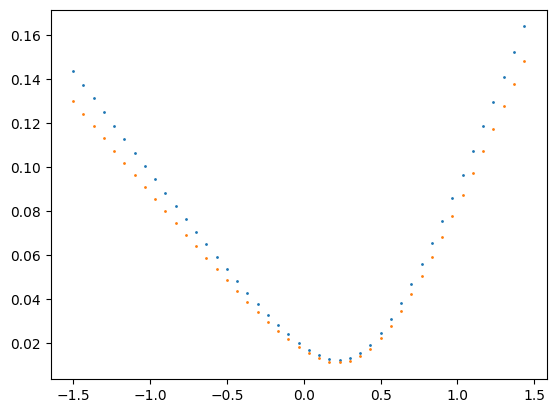

In [34]:
xs = torch.tensor(np.arange(45)/15 - 1.5)
res = axel_svi(xs)
plt.scatter(xs, res[0], s=1)
plt.scatter(xs, res[1], s=1)

1
torch.Size([45])
torch.Size([45])
tensor(0.0111) tensor(0.0122)
Mid shape torch.Size([45])
0
torch.Size([45]) torch.Size([45])
tensor([[ 0.1436],
        [ 0.1374],
        [ 0.1312],
        [ 0.1250],
        [ 0.1188],
        [ 0.1126],
        [ 0.1065],
        [ 0.1004],
        [ 0.0944],
        [ 0.0883],
        [ 0.0824],
        [ 0.0765],
        [ 0.0706],
        [ 0.0648],
        [ 0.0591],
        [ 0.0535],
        [ 0.0481],
        [ 0.0427],
        [ 0.0376],
        [ 0.0327],
        [ 0.0281],
        [ 0.0238],
        [ 0.0200],
        [ 0.0168],
        [ 0.0143],
        [ 0.0127],
        [ 0.0122],
        [ 0.0131],
        [ 0.0153],
        [ 0.0191],
        [ 0.0243],
        [ 0.0308],
        [ 0.0383],
        [ 0.0467],
        [ 0.0558],
        [ 0.0654],
        [ 0.0755],
        [ 0.0859],
        [ 0.0965],
        [ 0.1074],
        [ 0.1185],
        [ 0.1297],
        [ 0.1410],
        [ 0.1524],
        [ 0.1639],
        [ 0.1299

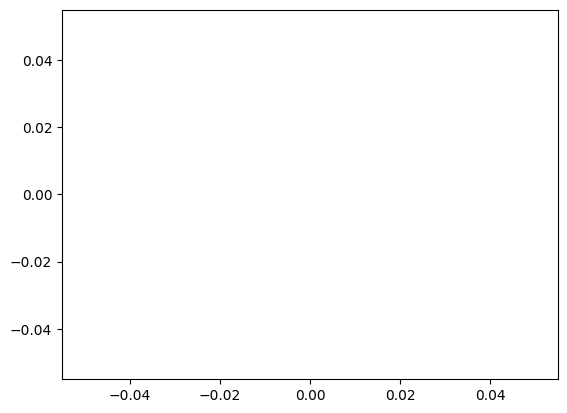

In [47]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# This is for axel
R = 0.000 # Rate for > 122 day
F = 1 # for ID 102434, Exp date 05/31/2022
T = 1
S = 1
print(T)
log_strikes = xs
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
# his, lows = svi_with_noise(log_strikes, *params)
# mids = torch.tensor(his + lows) / 2
# mids = mids * T
his = res[0]
lows = res[1]
# mids = torch.tensor(((processed['vol_high'].to_numpy() + processed['vol_low'].to_numpy()) / 2))
mids = (his + lows) / 2
print(mids.shape)
mids = mids
print(mids.shape)
print(min(lows), min(his))
print('Mid shape', mids.shape)
# print(mids)
low = 0
print(low)
print(his.shape, lows.shape)
# datum, log_strikes = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes, mids, low)#, low)
datum = torch.tensor(np.vstack([ his.reshape(-1,1) , lows.reshape(-1,1) , log_strikes.reshape(-1,1), np.log(S), T, R])).double()
print(datum)
print(log_strikes.shape, datum.shape)
print(datum.T.shape)
model.train(datum.T.double(), log_strikes, epochs=1601)

tensor([-0.0256, -0.0233, -0.0211, -0.0188, -0.0166, -0.0144, -0.0121, -0.0099,
        -0.0077, -0.0055, -0.0033, -0.0010,  0.0012,  0.0033,  0.0055,  0.0077,
         0.0099,  0.0121,  0.0143,  0.0164,  0.0186,  0.0207,  0.0229,  0.0250,
         0.0272,  0.0293,  0.0315,  0.0336,  0.0357,  0.0378,  0.0400,  0.0421,
         0.0442,  0.0463,  0.0484,  0.0505,  0.0526,  0.0546,  0.0567])
(39,)
(39,)
Mid shape (39,)
3.939319132699472e-08
(39,) (39,)
torch.Size([39]) torch.Size([120, 1])
torch.Size([1, 120])


d:\Project\smilecorrector_gsvi_jo_mw_ar.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mids = torch.sqrt(torch.max(torch.tensor(mids**2 - low),torch.tensor(0)))
d:\Project\smilecorrector_gsvi_jo_mw_ar.py:292: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bounds = torch.hstack([torch.tensor(self.strike_low).reshape(1,1), knots, torch.tensor(self.strike_high).reshape(1,1)])
d:\Project\smilecorrector_gsvi_jo_mw_ar.py:680: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ctx.save_for_backward(coeffs, torch.tensor(x))
d:\Project\smilecorre

0.0 0 nan
Epoch: 0
Arb loss 0.0
Real arb loss 0.0
Bounds loss: 0.0
MAPE:  0.0
Delta:  0.10695414714600782
Breaking and plotting at epoch 0 with bounds loss tensor(0., grad_fn=<MulBackward0>) and arb loss tensor(0., grad_fn=<MulBackward0>)


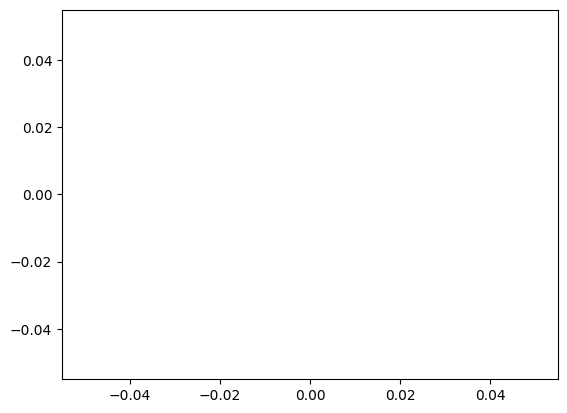

In [282]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
R = 0.00518
F = 2272.376330 # for ID 102434, Exp date 30/12/2022
T = 4/365.0
S = F * np.exp(-R * T)
log_strikes = torch.tensor((processed2['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
# his, lows = svi_with_noise(log_strikes, *params)
# mids = torch.tensor(his + lows) / 2
# mids = mids * T
his = processed2['vol_high'].to_numpy() ** 2 * T.item()
lows = processed2['vol_low'].to_numpy() ** 2 * T.item()
# mids = torch.tensor(((processed2['vol_high'].to_numpy() + processed2['vol_low'].to_numpy()) / 2))
mids = (his + lows) / 2
print(mids.shape)
mids = mids
print(mids.shape)
print('Mid shape', mids.shape)
# print(mids)
low = min(mids**2)/2
print(low)
print(his.shape, lows.shape)
# datum, log_strikes = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes, mids, low)#, low)
datum = torch.tensor(np.vstack([ his.reshape(-1,1) , lows.reshape(-1,1) , log_strikes.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes.shape, datum.shape)
print(datum.T.shape)
w_5 = model.train(datum.T.double(), log_strikes, epochs=1601)

tensor([-0.0256, -0.0233, -0.0211, -0.0188, -0.0166, -0.0144, -0.0121, -0.0099,
        -0.0077, -0.0055, -0.0033, -0.0010,  0.0012,  0.0033,  0.0055,  0.0077,
         0.0099,  0.0121,  0.0143,  0.0164,  0.0186,  0.0207,  0.0229,  0.0250,
         0.0272,  0.0293,  0.0315,  0.0336,  0.0357,  0.0378,  0.0400,  0.0421,
         0.0442,  0.0463,  0.0484,  0.0505,  0.0526,  0.0546,  0.0567])
(39,)
(39,)
Mid shape (39,)
3.939319132699472e-08
(39,) (39,)
torch.Size([39]) torch.Size([120, 1])
torch.Size([1, 120])
0.0 0 nan
Epoch: 0
Arb loss 0.0
Real arb loss 0.0
Bounds loss: 0.0
MAPE:  0.0
Delta:  0.1227962577793899
Breaking and plotting at epoch 0 with bounds loss tensor(0., grad_fn=<MulBackward0>) and arb loss tensor(0., grad_fn=<MulBackward0>)


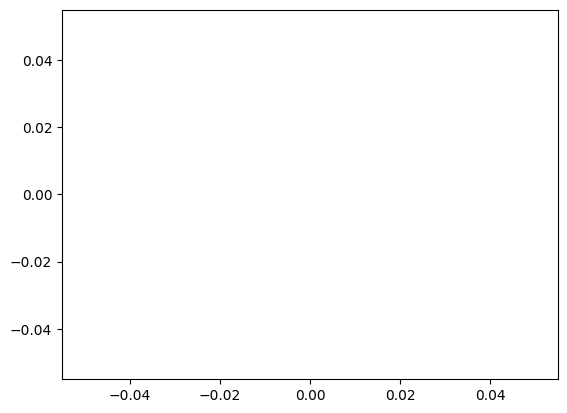

In [283]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
R = 0.00518
F = 2272.376330 # for ID 102434, Exp date 30/12/2022
T = 4/365.0
S = F * np.exp(-R * T)
log_strikes = torch.tensor((processed2['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
# his, lows = svi_with_noise(log_strikes, *params)
# mids = torch.tensor(his + lows) / 2
# mids = mids * T
his = processed2['vol_high'].to_numpy() ** 2 * T.item()
lows = processed2['vol_low'].to_numpy() ** 2 * T.item()
# mids = torch.tensor(((processed2['vol_high'].to_numpy() + processed2['vol_low'].to_numpy()) / 2))
mids = (his + lows) / 2
print(mids.shape)
mids = mids
print(mids.shape)
print('Mid shape', mids.shape)
# print(mids)
low = min(mids**2)/2
print(low)
print(his.shape, lows.shape)
# datum, log_strikes = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(4, log_strikes, mids, low)#, low)
datum = torch.tensor(np.vstack([ his.reshape(-1,1) , lows.reshape(-1,1) , log_strikes.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes.shape, datum.shape)
print(datum.T.shape)
w_4 = model.train(datum.T.double(), log_strikes, epochs=1601)

tensor([-0.0256, -0.0233, -0.0211, -0.0188, -0.0166, -0.0144, -0.0121, -0.0099,
        -0.0077, -0.0055, -0.0033, -0.0010,  0.0012,  0.0033,  0.0055,  0.0077,
         0.0099,  0.0121,  0.0143,  0.0164,  0.0186,  0.0207,  0.0229,  0.0250,
         0.0272,  0.0293,  0.0315,  0.0336,  0.0357,  0.0378,  0.0400,  0.0421,
         0.0442,  0.0463,  0.0484,  0.0505,  0.0526,  0.0546,  0.0567])
(39,)
(39,)
Mid shape (39,)
3.939319132699472e-08
(39,) (39,)
torch.Size([39]) torch.Size([120, 1])
torch.Size([1, 120])
0.0 0.0 nan
Epoch: 0
Arb loss 0.0
Real arb loss 0.0
Bounds loss: 1.9827900331114208
MAPE:  0.010580652074278196
Delta:  0.17593520432298787
GRAD
 tensor([0., 0., 0., 0.])
-0.001323427021484358 0.06797159074817105 nan
Epoch: 1
Arb loss 0.0
Real arb loss 0.0
Bounds loss: 1.8480166404412188
MAPE:  0.010534691960926264
Delta:  0.1761680417264193
GRAD
 tensor([0., 0., 0., 0.])
-0.0007289361536144678 0.02372758021092114 nan
Epoch: 2
Arb loss 0.0
Real arb loss 0.0
Bounds loss: 1.8041676773

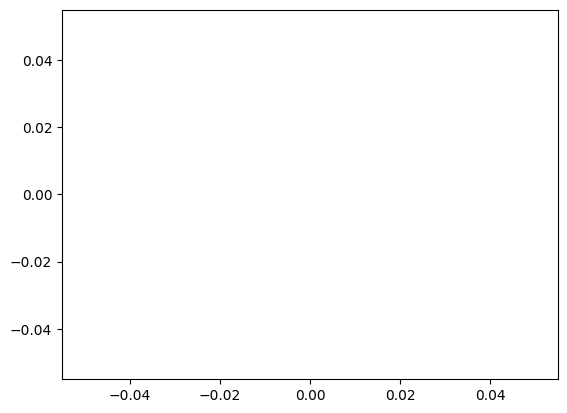

In [294]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
R = 0.00518
F = 2272.376330 # for ID 102434, Exp date 30/12/2022
T = 4/365.0
S = F * np.exp(-R * T)
log_strikes = torch.tensor((processed2['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
# his, lows = svi_with_noise(log_strikes, *params)
# mids = torch.tensor(his + lows) / 2
# mids = mids * T
his = processed2['vol_high'].to_numpy() ** 2 * T.item()
lows = processed2['vol_low'].to_numpy() ** 2 * T.item()
# mids = torch.tensor(((processed2['vol_high'].to_numpy() + processed2['vol_low'].to_numpy()) / 2))
mids = (his + lows) / 2
print(mids.shape)
mids = mids
print(mids.shape)
print('Mid shape', mids.shape)
# print(mids)
low = min(mids**2)/2
print(low)
print(his.shape, lows.shape)
# datum, log_strikes = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(3, log_strikes, mids, low)#, low)
datum = torch.tensor(np.vstack([ his.reshape(-1,1) , lows.reshape(-1,1) , log_strikes.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes.shape, datum.shape)
print(datum.T.shape)
w_6 = model.train(datum.T.double(), log_strikes, epochs=1601, inlr=1.0e-11)

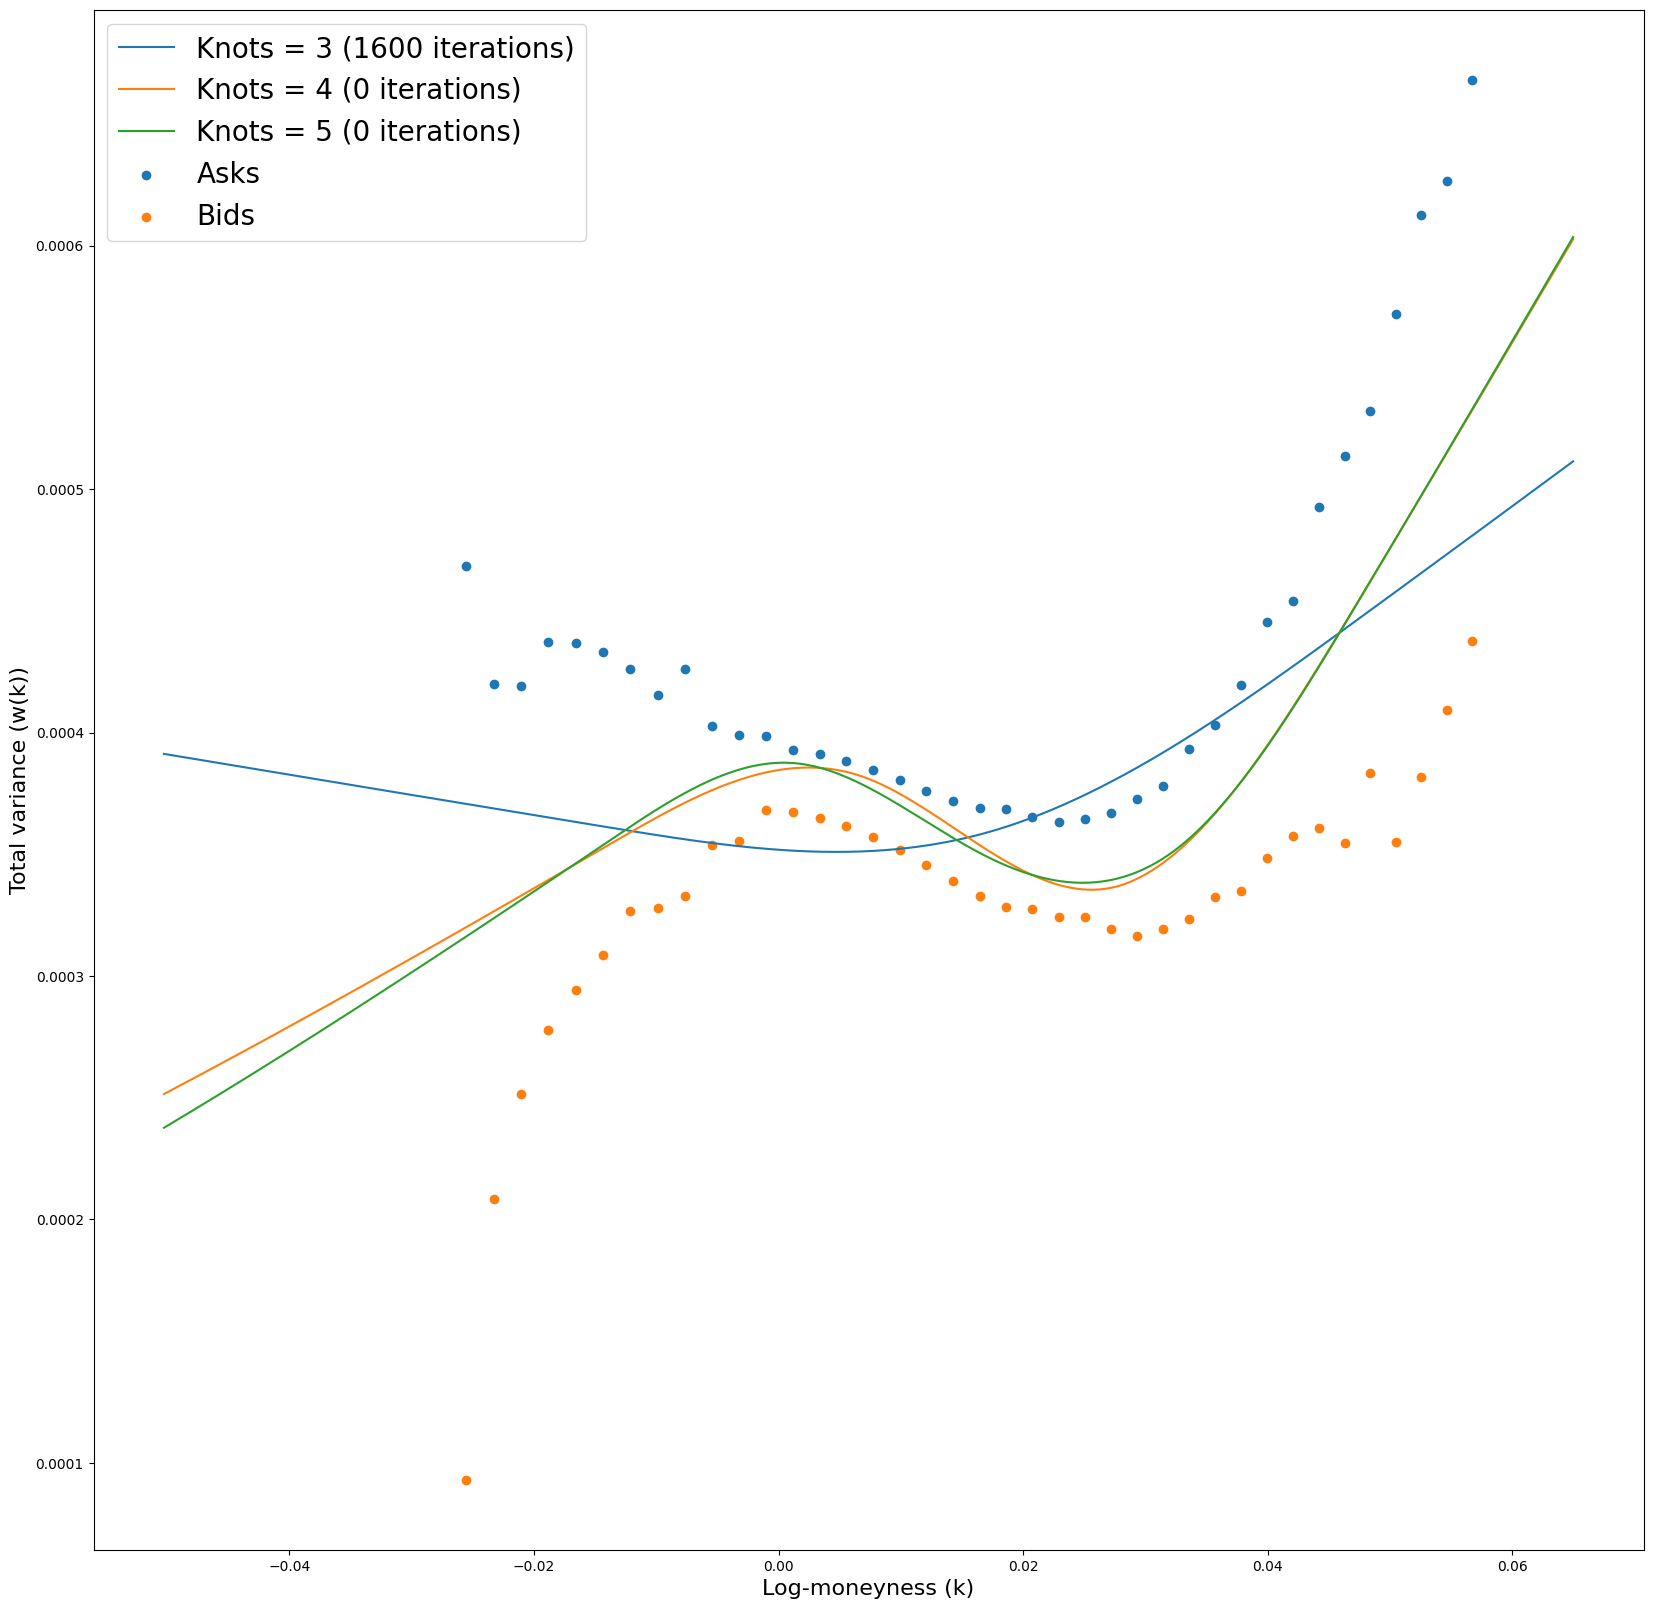

In [310]:
plt.figure(figsize=(20,20))
x_min = log_strikes[0] - (log_strikes[-1] - log_strikes[0]) * 0.3
x_max = log_strikes[-1] + (log_strikes[-1] - log_strikes[0]) * 0.1
lins = np.linspace(x_min, x_max, num=1000)
plt.plot(lins,[w_6(x) for x in lins], label='Knots = 3 (1600 iterations)') # actually w3
plt.plot(lins,[w_4(x) for x in lins], label='Knots = 4 (0 iterations)') # actually w3
plt.plot(lins,[w_5(x) for x in lins], label='Knots = 5 (0 iterations)') # actually w3
plt.scatter(log_strikes, his, label='Asks')
plt.scatter(log_strikes, lows, label='Bids')
plt.ylabel('Total variance (w(k))')
plt.xlabel('Log-moneyness (k)')
plt.legend(loc='upper left', prop={'size':20})
plt.savefig('diffknots.png')



tensor(1.0000)


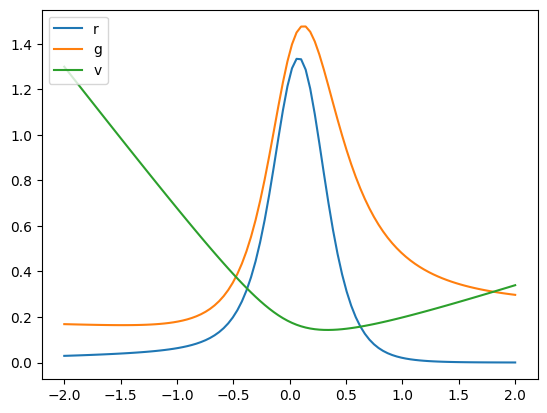

In [ ]:
import smilecorrector_gsvi_jo as smilenet
importlib.reload(smilenet)
params =  (0, 0.4, -0.6, 0, 0.2)
f = lambda x: svi(x, *params)
g = g_svi(*params)
rnm = smilenet.f_g_to_rnm(f, g)
# rnm = lambda x: -x / (f(x) ** 0.5) - f(x)**0.5 / 2 
xs = torch.tensor(np.linspace(-2,2,num=100))
plt.plot(xs, rnm(xs), label='r')
plt.plot(xs, g(xs), label='g')
plt.plot(xs, f(xs), label='v')
plt.legend(loc='upper left')
print(smilenet.diff_integ(rnm, -100, 100, delta=1.0e-1))

In [ ]:
print(2640.25 * np.exp(0.005252 * 45 /365 ))

2641.9601335607513


0.4246575342465753
tensor([-6.7841e-01, -6.3585e-01, -5.9503e-01, -5.5581e-01, -5.1807e-01,
        -4.8170e-01, -4.4661e-01, -4.1271e-01, -3.7992e-01, -3.4817e-01,
        -3.1739e-01, -2.8754e-01, -2.5855e-01, -2.4156e-01, -2.3875e-01,
        -2.3595e-01, -2.3317e-01, -2.3038e-01, -2.2761e-01, -2.2484e-01,
        -2.2208e-01, -2.1933e-01, -2.1659e-01, -2.1385e-01, -2.1113e-01,
        -2.0840e-01, -2.0569e-01, -2.0298e-01, -2.0029e-01, -1.9759e-01,
        -1.9491e-01, -1.9223e-01, -1.8956e-01, -1.8690e-01, -1.8424e-01,
        -1.8159e-01, -1.7895e-01, -1.7632e-01, -1.7369e-01, -1.7107e-01,
        -1.6845e-01, -1.6585e-01, -1.6324e-01, -1.6065e-01, -1.5806e-01,
        -1.5548e-01, -1.5291e-01, -1.5034e-01, -1.4778e-01, -1.4523e-01,
        -1.4268e-01, -1.4014e-01, -1.3760e-01, -1.3507e-01, -1.3255e-01,
        -1.3004e-01, -1.2753e-01, -1.2502e-01, -1.2253e-01, -1.2004e-01,
        -1.1755e-01, -1.1507e-01, -1.1260e-01, -1.1013e-01, -1.0767e-01,
        -1.0522e-01, -1.0277e-01

<function smilecorrector_gsvi_jo_mw_ar.SmileNet.train.<locals>.<lambda>(k, buckets=tensor([-0.8784, -0.4819, -0.2202, -0.0131,  0.1585,  0.3049,  0.8758],
       grad_fn=<AsStridedBackward0>), fs=[<function p_to_f.<locals>.<lambda> at 0x000001F92B36F600>, <function p_to_f.<locals>.<lambda> at 0x000001F92B36ED40>, <function p_to_f.<locals>.<lambda> at 0x000001F92B36EC00>, <function p_to_f.<locals>.<lambda> at 0x000001F92B36F6A0>, <function p_to_f.<locals>.<lambda> at 0x000001F92B36F880>, <function p_to_f.<locals>.<lambda> at 0x000001F92B36F7E0>])>

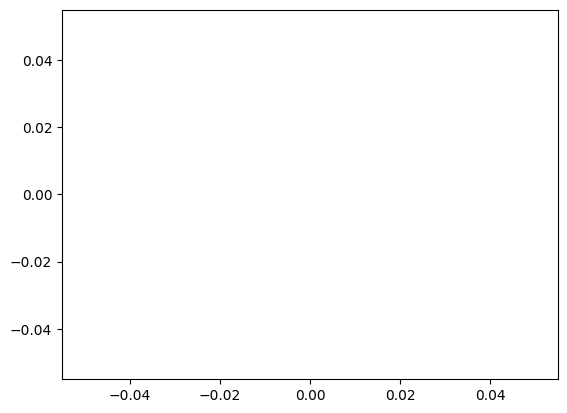

In [93]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
log_strikes = torch.tensor((processed['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his, lows = svi_with_noise(log_strikes, *params)
# mids = torch.tensor(his + lows) / 2
# mids = mids * T
his = processed['vol_high'].to_numpy() ** 2 * T.item()
lows = processed['vol_low'].to_numpy() ** 2 * T.item()
# mids = torch.tensor(((processed['vol_high'].to_numpy() + processed['vol_low'].to_numpy()) / 2))
mids = (his + lows) / 2
print(mids.shape)
mids = mids
print(mids.shape)
print('Mid shape', mids.shape)
# print(mids)
low = min(mids**2)/2
print(low)
print(his.shape, lows.shape)
# datum, log_strikes = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes, mids, low)#, low)
datum = torch.tensor(np.vstack([ his.reshape(-1,1) , lows.reshape(-1,1) , log_strikes.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes.shape, datum.shape)
print(datum.T.shape)
model.train(datum.T.double(), log_strikes, epochs=1601)

In [169]:
import numpy as np
def remove(processed, frac, F):
    spreads = abs((processed['vol_high'] - processed['vol_low']).to_numpy())
    weights = spreads / sum(spreads)
    selection = np.random.choice(processed.index.to_numpy(), replace=False, size=int(weights.shape[0] * frac),  p=weights)#
    return processed.loc[~processed.index.isin(sorted(selection)), :]


0.4246575342465753
tensor([-0.5558, -0.3799, -0.3482, -0.3174, -0.2875, -0.2586, -0.2416, -0.2388,
        -0.2332, -0.2304, -0.2276, -0.2248, -0.2221, -0.2193, -0.2166, -0.2139,
        -0.2111, -0.2084, -0.2057, -0.2030, -0.1976, -0.1949, -0.1922, -0.1896,
        -0.1842, -0.1816, -0.1763, -0.1737, -0.1711, -0.1685, -0.1658, -0.1632,
        -0.1607, -0.1581, -0.1555, -0.1529, -0.1503, -0.1478, -0.1452, -0.1401,
        -0.1376, -0.1351, -0.1326, -0.1300, -0.1250, -0.1225, -0.1200, -0.1176,
        -0.1151, -0.1126, -0.1101, -0.1077, -0.1052, -0.1028, -0.1003, -0.0979,
        -0.0955, -0.0930, -0.0906, -0.0882, -0.0858, -0.0810, -0.0786, -0.0762,
        -0.0739, -0.0715, -0.0691, -0.0644, -0.0620, -0.0597, -0.0574, -0.0550,
        -0.0527, -0.0504, -0.0481, -0.0457, -0.0434, -0.0411, -0.0388, -0.0366,
        -0.0343, -0.0320, -0.0297, -0.0274, -0.0252, -0.0229, -0.0207, -0.0184,
        -0.0162, -0.0139, -0.0117, -0.0095, -0.0072, -0.0050, -0.0028,  0.0016,
         0.0038,  0.0

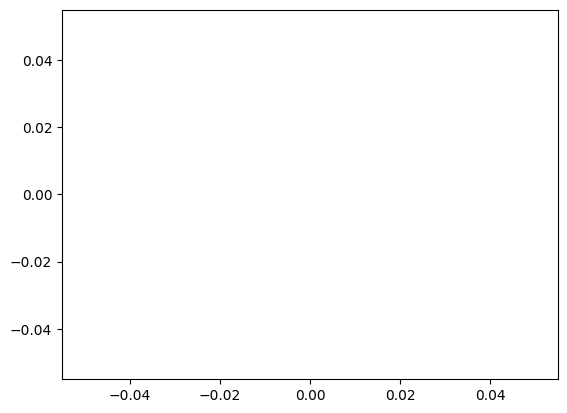

In [171]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed_90['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
processed_90 = remove(processed, 0.10, F)
log_strikes_90 = torch.tensor((processed_90['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes_90)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his_90, lows_90 = svi_with_noise(log_strikes_90, *params)
# mids_90 = torch.tensor(his_90 + lows_90) / 2
# mids_90 = mids_90 * T
his_90 = processed_90['vol_high'].to_numpy() ** 2 * T.item()
lows_90 = processed_90['vol_low'].to_numpy() ** 2 * T.item()
# mids_90 = torch.tensor(((processed_90['vol_high'].to_numpy() + processed_90['vol_low'].to_numpy()) / 2))
mids_90 = (his_90 + lows_90) / 2
print(mids_90.shape)
mids_90 = mids_90
print(mids_90.shape)
print('Mid shape', mids_90.shape)
# print(mids_90)
low = min(mids_90**2)/2
print(low)
print(his_90.shape, lows_90.shape)
# datum, log_strikes_90 = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes_90, mids_90, low)#, low)
datum = torch.tensor(np.vstack([ his_90.reshape(-1,1) , lows_90.reshape(-1,1) , log_strikes_90.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes_90.shape, datum.shape)
print(datum.T.shape)
w_90 = model.train(datum.T.double(), log_strikes_90, epochs=1601)

0.0


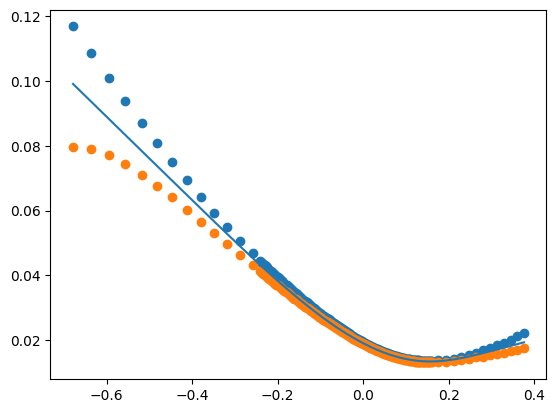

In [172]:
plt.plot(log_strikes, [w_90(i) for i in log_strikes])
plt.scatter(log_strikes, his)
plt.scatter(log_strikes, lows)
print(sum([max(abs(w_90(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) for i in range(log_strikes.shape[0])])/ log_strikes.shape[0]) 

0.4246575342465753
tensor([-0.3799, -0.3482, -0.3174, -0.2586, -0.2416, -0.2360, -0.2332, -0.2276,
        -0.2248, -0.2221, -0.2139, -0.2111, -0.2084, -0.2057, -0.2030, -0.1976,
        -0.1949, -0.1922, -0.1896, -0.1869, -0.1842, -0.1816, -0.1737, -0.1711,
        -0.1685, -0.1658, -0.1632, -0.1607, -0.1555, -0.1529, -0.1401, -0.1351,
        -0.1326, -0.1300, -0.1275, -0.1250, -0.1225, -0.1200, -0.1176, -0.1151,
        -0.1126, -0.1101, -0.1077, -0.1028, -0.1003, -0.0979, -0.0955, -0.0930,
        -0.0882, -0.0858, -0.0786, -0.0762, -0.0739, -0.0691, -0.0668, -0.0644,
        -0.0620, -0.0597, -0.0574, -0.0550, -0.0527, -0.0504, -0.0457, -0.0434,
        -0.0411, -0.0388, -0.0366, -0.0343, -0.0320, -0.0297, -0.0274, -0.0229,
        -0.0184, -0.0162, -0.0139, -0.0117, -0.0095, -0.0072, -0.0050, -0.0028,
        -0.0006,  0.0016,  0.0038,  0.0060,  0.0082,  0.0104,  0.0126,  0.0147,
         0.0169,  0.0191,  0.0212,  0.0234,  0.0255,  0.0277,  0.0298,  0.0341,
         0.0362,  0.0

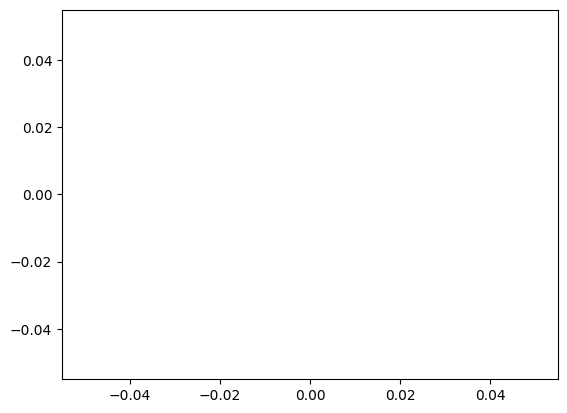

In [174]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed_80['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
processed_80 = remove(processed, 0.20, F)
log_strikes_80 = torch.tensor((processed_80['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes_80)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his_80, lows_80 = svi_with_noise(log_strikes_80, *params)
# mids_80 = torch.tensor(his_80 + lows_80) / 2
# mids_80 = mids_80 * T
his_80 = processed_80['vol_high'].to_numpy() ** 2 * T.item()
lows_80 = processed_80['vol_low'].to_numpy() ** 2 * T.item()
# mids_80 = torch.tensor(((processed_80['vol_high'].to_numpy() + processed_80['vol_low'].to_numpy()) / 2))
mids_80 = (his_80 + lows_80) / 2
print(mids_80.shape)
mids_80 = mids_80
print(mids_80.shape)
print('Mid shape', mids_80.shape)
# print(mids_80)
low = min(mids_80**2)/2
print(low)
print(his_80.shape, lows_80.shape)
# datum, log_strikes_80 = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes_80, mids_80, low)#, low)
datum = torch.tensor(np.vstack([ his_80.reshape(-1,1) , lows_80.reshape(-1,1) , log_strikes_80.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes_80.shape, datum.shape)
print(datum.T.shape)
w_80 = model.train(datum.T.double(), log_strikes_80, epochs=1601)

0.0


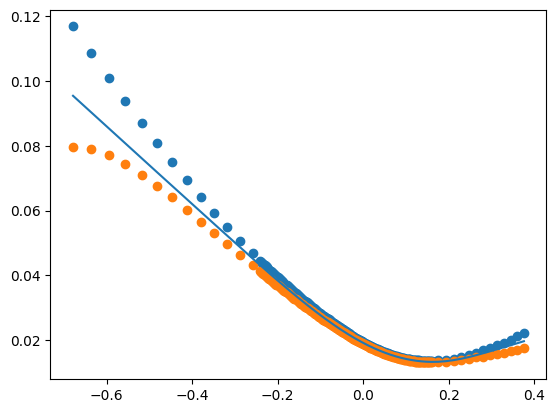

In [175]:
plt.plot(log_strikes, [w_80(i) for i in log_strikes])
plt.scatter(log_strikes, his)
plt.scatter(log_strikes, lows)
print(sum([max(abs(w_80(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) for i in range(log_strikes.shape[0])])/ log_strikes.shape[0]) 


0.4246575342465753
tensor([-0.2416, -0.2360, -0.2332, -0.2304, -0.2276, -0.2221, -0.2111, -0.2084,
        -0.2057, -0.2030, -0.2003, -0.1922, -0.1896, -0.1816, -0.1763, -0.1711,
        -0.1685, -0.1632, -0.1607, -0.1581, -0.1503, -0.1427, -0.1401, -0.1326,
        -0.1300, -0.1275, -0.1250, -0.1176, -0.1126, -0.1052, -0.1028, -0.0930,
        -0.0906, -0.0882, -0.0858, -0.0834, -0.0810, -0.0786, -0.0762, -0.0739,
        -0.0715, -0.0691, -0.0668, -0.0644, -0.0597, -0.0574, -0.0550, -0.0527,
        -0.0481, -0.0457, -0.0434, -0.0411, -0.0388, -0.0366, -0.0343, -0.0320,
        -0.0274, -0.0252, -0.0229, -0.0207, -0.0184, -0.0162, -0.0139, -0.0117,
        -0.0095, -0.0072, -0.0028, -0.0006,  0.0038,  0.0082,  0.0104,  0.0126,
         0.0147,  0.0169,  0.0212,  0.0234,  0.0255,  0.0298,  0.0320,  0.0362,
         0.0384,  0.0426,  0.0447,  0.0489,  0.0531,  0.0552,  0.0573,  0.0594,
         0.0615,  0.0635,  0.0656,  0.0677,  0.0718,  0.0738,  0.0759,  0.0779,
         0.0800,  0.0

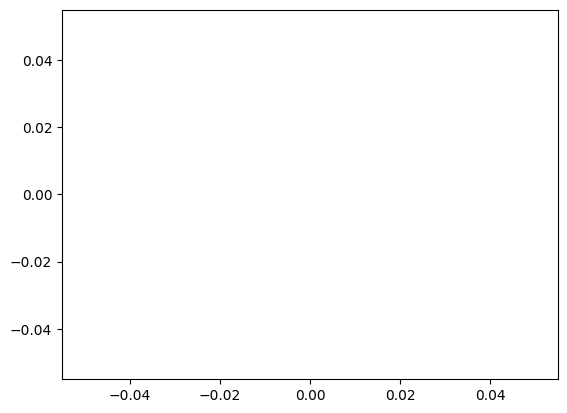

In [176]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed_70['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
processed_70 = remove(processed, (1.0 - 0.70), F)
log_strikes_70 = torch.tensor((processed_70['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes_70)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his_70, lows_70 = svi_with_noise(log_strikes_70, *params)
# mids_70 = torch.tensor(his_70 + lows_70) / 2
# mids_70 = mids_70 * T
his_70 = processed_70['vol_high'].to_numpy() ** 2 * T.item()
lows_70 = processed_70['vol_low'].to_numpy() ** 2 * T.item()
# mids_70 = torch.tensor(((processed_70['vol_high'].to_numpy() + processed_70['vol_low'].to_numpy()) / 2))
mids_70 = (his_70 + lows_70) / 2
print(mids_70.shape)
mids_70 = mids_70
print(mids_70.shape)
print('Mid shape', mids_70.shape)
# print(mids_70)
low = min(mids_70**2)/2
print(low)
print(his_70.shape, lows_70.shape)
# datum, log_strikes_70 = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes_70, mids_70, low)#, low)
datum = torch.tensor(np.vstack([ his_70.reshape(-1,1) , lows_70.reshape(-1,1) , log_strikes_70.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes_70.shape, datum.shape)
print(datum.T.shape)
w_70 = model.train(datum.T.double(), log_strikes_70, epochs=1601)


0.0


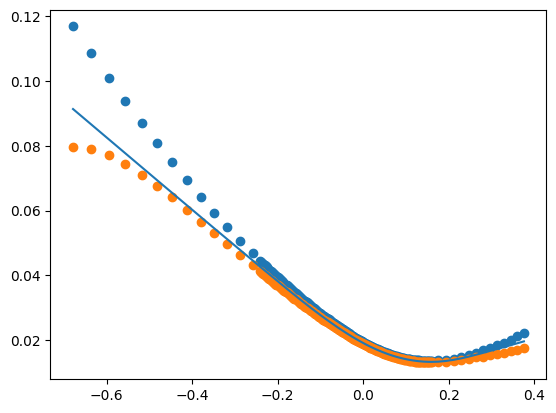

In [177]:
plt.plot(log_strikes, [w_70(i) for i in log_strikes])
plt.scatter(log_strikes, his)
plt.scatter(log_strikes, lows)
print(sum([max(abs(w_70(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) for i in range(log_strikes.shape[0])])/ log_strikes.shape[0]) 

0.4246575342465753
tensor([-0.2875, -0.2304, -0.2193, -0.2166, -0.2139, -0.2084, -0.1976, -0.1949,
        -0.1842, -0.1790, -0.1737, -0.1711, -0.1685, -0.1632, -0.1581, -0.1503,
        -0.1427, -0.1326, -0.1300, -0.1275, -0.1200, -0.1176, -0.1151, -0.1077,
        -0.1052, -0.1003, -0.0979, -0.0955, -0.0930, -0.0882, -0.0858, -0.0810,
        -0.0786, -0.0762, -0.0739, -0.0715, -0.0691, -0.0668, -0.0597, -0.0550,
        -0.0527, -0.0504, -0.0481, -0.0457, -0.0434, -0.0411, -0.0388, -0.0366,
        -0.0343, -0.0320, -0.0274, -0.0252, -0.0229, -0.0184, -0.0139, -0.0095,
        -0.0028,  0.0038,  0.0082,  0.0126,  0.0147,  0.0169,  0.0191,  0.0212,
         0.0234,  0.0255,  0.0298,  0.0362,  0.0384,  0.0405,  0.0426,  0.0489,
         0.0510,  0.0531,  0.0552,  0.0573,  0.0594,  0.0656,  0.0718,  0.0738,
         0.0759,  0.0779,  0.0800,  0.0820,  0.0840,  0.0881,  0.0901,  0.0921,
         0.0961,  0.1001,  0.1021,  0.1041,  0.1061,  0.1100,  0.1120,  0.1140,
         0.1160,  0.1

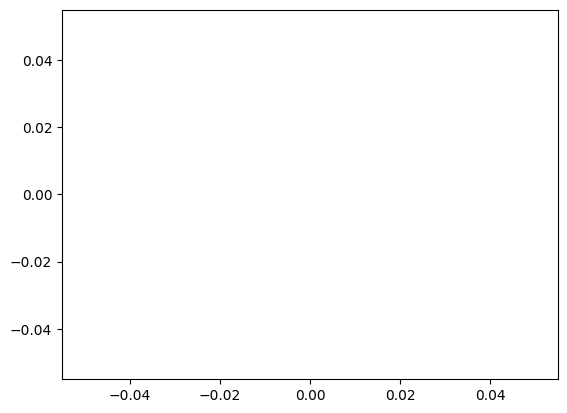

In [178]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed_60['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
processed_60 = remove(processed, 0.40, F)
log_strikes_60 = torch.tensor((processed_60['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes_60)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his_60, lows_60 = svi_with_noise(log_strikes_60, *params)
# mids_60 = torch.tensor(his_60 + lows_60) / 2
# mids_60 = mids_60 * T
his_60 = processed_60['vol_high'].to_numpy() ** 2 * T.item()
lows_60 = processed_60['vol_low'].to_numpy() ** 2 * T.item()
# mids_60 = torch.tensor(((processed_60['vol_high'].to_numpy() + processed_60['vol_low'].to_numpy()) / 2))
mids_60 = (his_60 + lows_60) / 2
print(mids_60.shape)
mids_60 = mids_60
print(mids_60.shape)
print('Mid shape', mids_60.shape)
# print(mids_60)
low = min(mids_60**2)/2
print(low)
print(his_60.shape, lows_60.shape)
# datum, log_strikes_60 = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes_60, mids_60, low)#, low)
datum = torch.tensor(np.vstack([ his_60.reshape(-1,1) , lows_60.reshape(-1,1) , log_strikes_60.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes_60.shape, datum.shape)
print(datum.T.shape)
w_60 = model.train(datum.T.double(), log_strikes_60, epochs=1601)



0.0


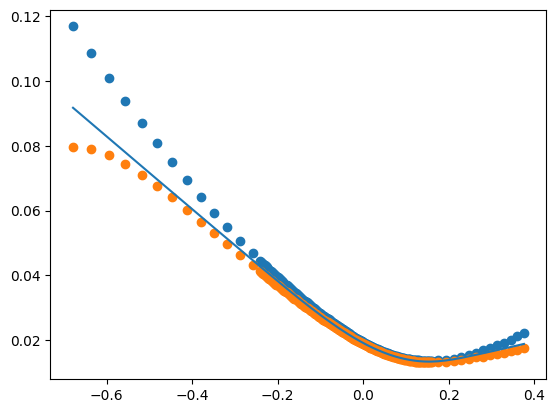

In [179]:
plt.plot(log_strikes, [w_60(i) for i in log_strikes])
plt.scatter(log_strikes, his)
plt.scatter(log_strikes, lows)
print(sum([max(abs(w_60(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) for i in range(log_strikes.shape[0])])/ log_strikes.shape[0]) 

0.4246575342465753
tensor([-0.2388, -0.2332, -0.2166, -0.2030, -0.1949, -0.1842, -0.1790, -0.1763,
        -0.1685, -0.1658, -0.1607, -0.1529, -0.1478, -0.1452, -0.1427, -0.1401,
        -0.1376, -0.1351, -0.1300, -0.1200, -0.1151, -0.1101, -0.1052, -0.1028,
        -0.1003, -0.0906, -0.0739, -0.0668, -0.0644, -0.0620, -0.0597, -0.0574,
        -0.0550, -0.0481, -0.0457, -0.0434, -0.0366, -0.0343, -0.0297, -0.0274,
        -0.0252, -0.0207, -0.0184, -0.0162, -0.0139, -0.0117, -0.0072, -0.0050,
         0.0016,  0.0038,  0.0060,  0.0082,  0.0104,  0.0126,  0.0191,  0.0212,
         0.0255,  0.0298,  0.0320,  0.0341,  0.0405,  0.0447,  0.0468,  0.0510,
         0.0531,  0.0552,  0.0573,  0.0656,  0.0677,  0.0718,  0.0738,  0.0759,
         0.0779,  0.0820,  0.0840,  0.0860,  0.0901,  0.0921,  0.0941,  0.0961,
         0.1021,  0.1041,  0.1061,  0.1120,  0.1160,  0.1179,  0.1199,  0.1218,
         0.1257,  0.1277,  0.1296,  0.1335,  0.1354,  0.1373,  0.1431,  0.1469,
         0.1526,  0.1

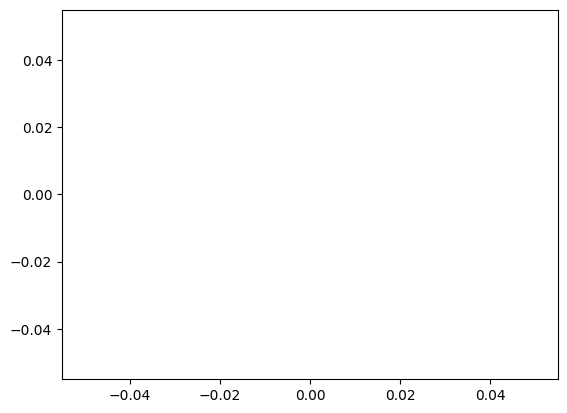

In [180]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed_50['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
processed_50 = remove(processed, 0.50, F)
log_strikes_50 = torch.tensor((processed_50['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes_50)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his_50, lows_50 = svi_with_noise(log_strikes_50, *params)
# mids_50 = torch.tensor(his_50 + lows_50) / 2
# mids_50 = mids_50 * T
his_50 = processed_50['vol_high'].to_numpy() ** 2 * T.item()
lows_50 = processed_50['vol_low'].to_numpy() ** 2 * T.item()
# mids_50 = torch.tensor(((processed_50['vol_high'].to_numpy() + processed_50['vol_low'].to_numpy()) / 2))
mids_50 = (his_50 + lows_50) / 2
print(mids_50.shape)
mids_50 = mids_50
print(mids_50.shape)
print('Mid shape', mids_50.shape)
# print(mids_50)
low = min(mids_50**2)/2
print(low)
print(his_50.shape, lows_50.shape)
# datum, log_strikes_50 = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes_50, mids_50, low)#, low)
datum = torch.tensor(np.vstack([ his_50.reshape(-1,1) , lows_50.reshape(-1,1) , log_strikes_50.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes_50.shape, datum.shape)
print(datum.T.shape)
w_50 = model.train(datum.T.double(), log_strikes_50, epochs=1601)



0.001140161561049604
0.01624480169823255
0.23145279689306958


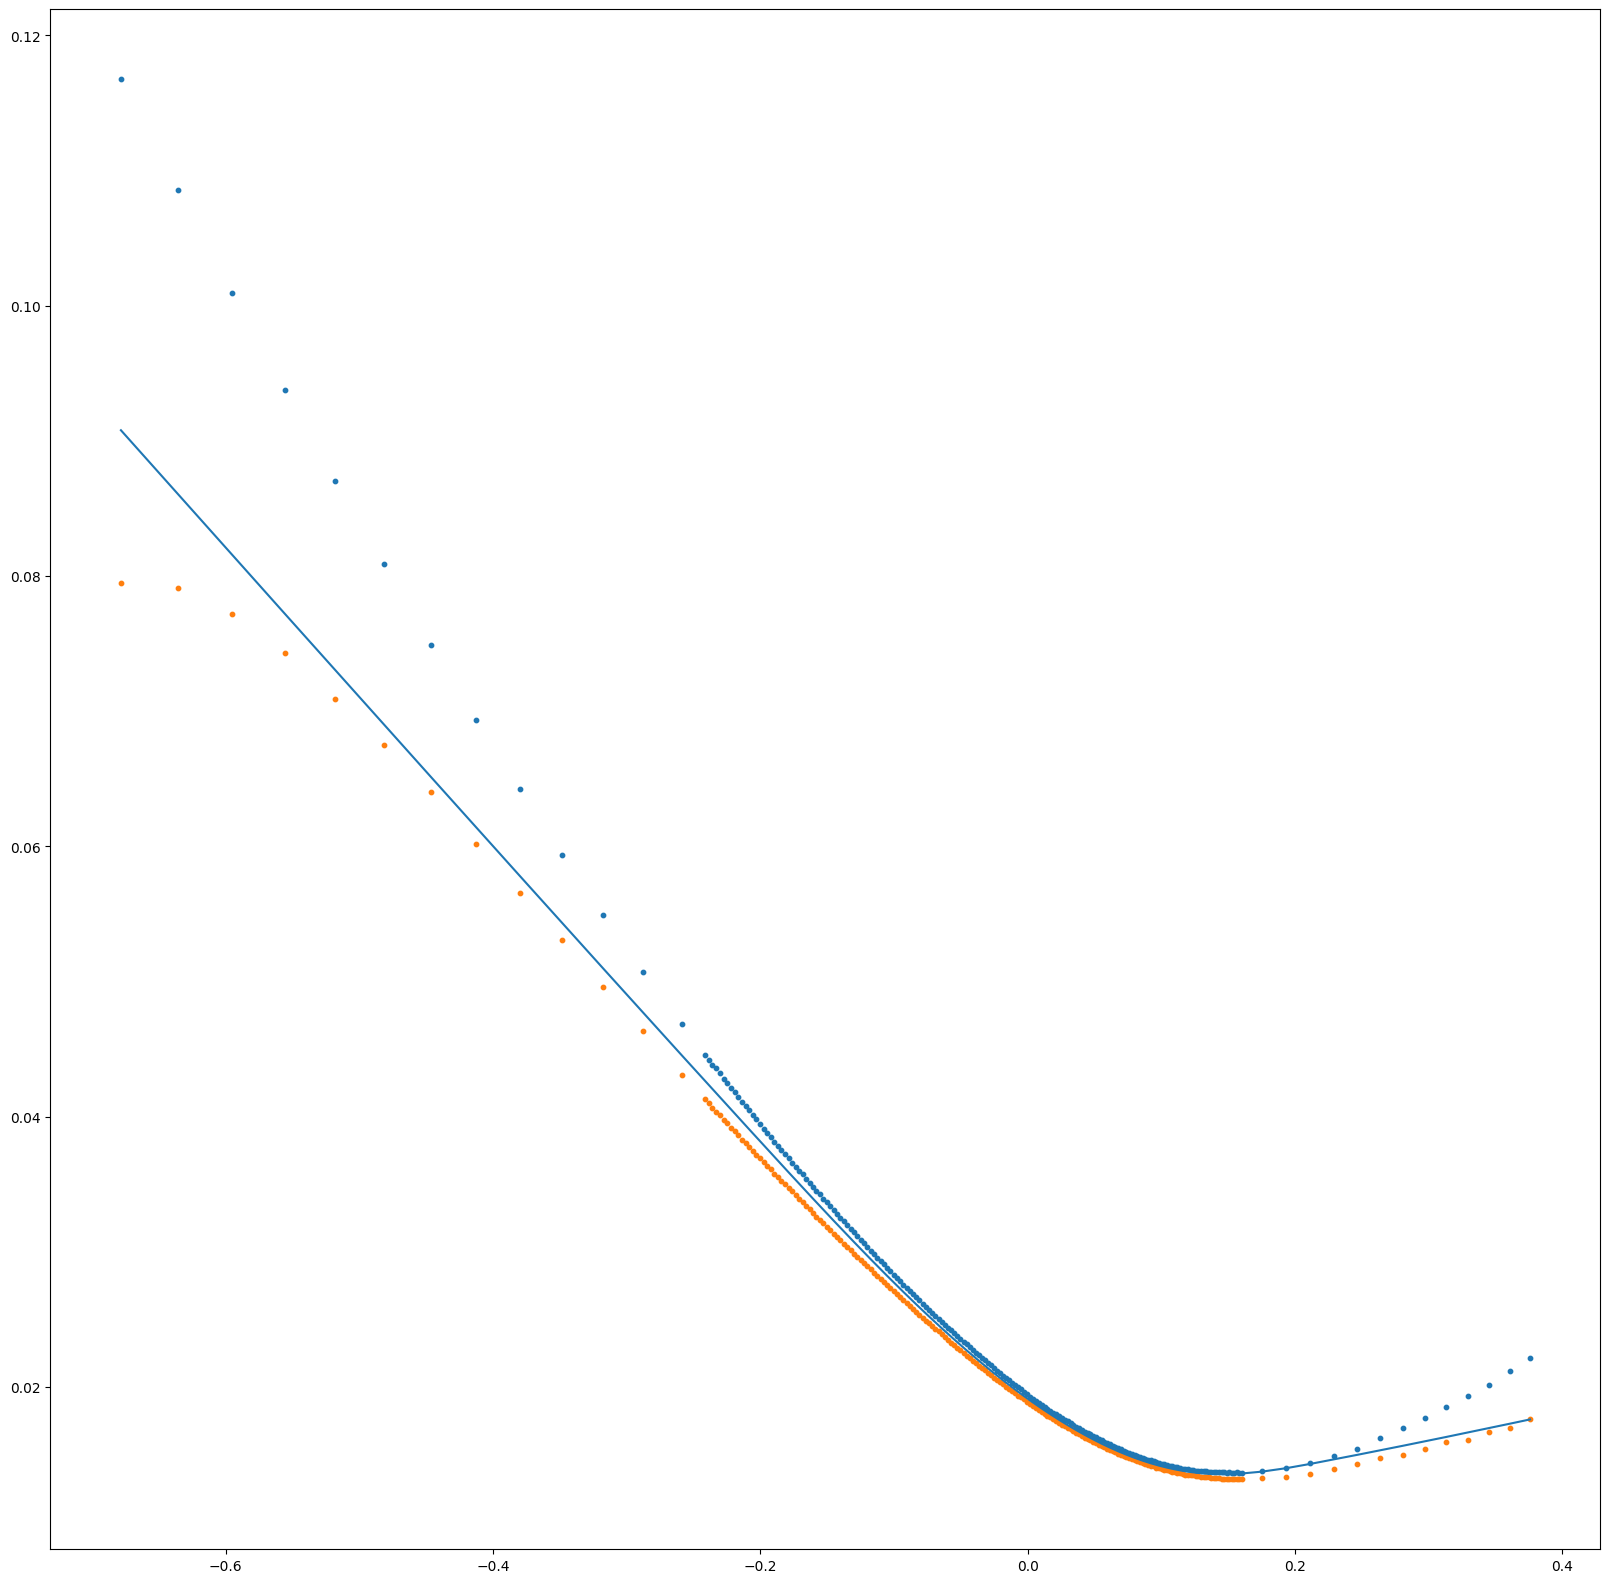

In [247]:
plt.figure(figsize=(20,20))
plt.plot(log_strikes, [w_50(i) for i in log_strikes])
plt.scatter(log_strikes, his, s=10)
plt.scatter(log_strikes, lows, s= 10)
print(sum([max(abs(w_50(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100 / log_strikes.shape[0]) 
print(np.sqrt(sum([(max(abs(w_50(log_strikes[i]).item() - mids[i]) - abs(his[i] - lows[i])/2, torch.tensor(0)).item() / mids[i])**2 for i in range(log_strikes.shape[0])])/ log_strikes.shape[0])* 100) 
print(max([max(abs(w_50(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100) # Max 
# print([max(abs(w_50(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) * 100 / mids[i] for i in range(log_strikes.shape[0])]) # Max 
plt.savefig('./50perc.png')

0.4246575342465753
tensor([-0.2360, -0.2304, -0.1976, -0.1869, -0.1790, -0.1763, -0.1711, -0.1685,
        -0.1658, -0.1351, -0.1200, -0.1151, -0.1126, -0.1077, -0.0979, -0.0930,
        -0.0906, -0.0810, -0.0786, -0.0739, -0.0668, -0.0644, -0.0620, -0.0597,
        -0.0527, -0.0481, -0.0343, -0.0274, -0.0229, -0.0162, -0.0050,  0.0016,
         0.0104,  0.0126,  0.0147,  0.0169,  0.0191,  0.0212,  0.0234,  0.0255,
         0.0277,  0.0298,  0.0320,  0.0384,  0.0405,  0.0426,  0.0489,  0.0531,
         0.0552,  0.0573,  0.0594,  0.0615,  0.0656,  0.0697,  0.0718,  0.0738,
         0.0759,  0.0779,  0.0800,  0.0820,  0.0860,  0.0901,  0.0961,  0.0981,
         0.1021,  0.1061,  0.1081,  0.1160,  0.1218,  0.1277,  0.1296,  0.1316,
         0.1335,  0.1354,  0.1373,  0.1488,  0.1507,  0.1526,  0.1564,  0.1583,
         0.2114,  0.2465])
(82,)
(82,)
Mid shape (82,)
9.012920106901195e-05
(82,) (82,)
torch.Size([82]) torch.Size([249, 1])
torch.Size([1, 249])
0.0 0.0 nan
Epoch: 0
Arb loss 0.0

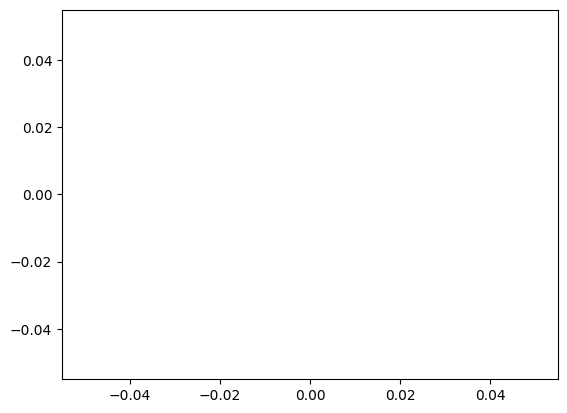

In [182]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed_40['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
processed_40 = remove(processed, 0.60, F)
log_strikes_40 = torch.tensor((processed_40['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes_40)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his_40, lows_40 = svi_with_noise(log_strikes_40, *params)
# mids_40 = torch.tensor(his_40 + lows_40) / 2
# mids_40 = mids_40 * T
his_40 = processed_40['vol_high'].to_numpy() ** 2 * T.item()
lows_40 = processed_40['vol_low'].to_numpy() ** 2 * T.item()
# mids_40 = torch.tensor(((processed_40['vol_high'].to_numpy() + processed_40['vol_low'].to_numpy()) / 2))
mids_40 = (his_40 + lows_40) / 2
print(mids_40.shape)
mids_40 = mids_40
print(mids_40.shape)
print('Mid shape', mids_40.shape)
# print(mids_40)
low = min(mids_40**2)/2
print(low)
print(his_40.shape, lows_40.shape)
# datum, log_strikes_40 = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes_40, mids_40, low)#, low)
datum = torch.tensor(np.vstack([ his_40.reshape(-1,1) , lows_40.reshape(-1,1) , log_strikes_40.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes_40.shape, datum.shape)
print(datum.T.shape)
w_40 = model.train(datum.T.double(), log_strikes_40, epochs=1601)



torch.Size([82]) torch.Size([203])
0.021918012122892534
0.1419749740299914
1.3066229347143434


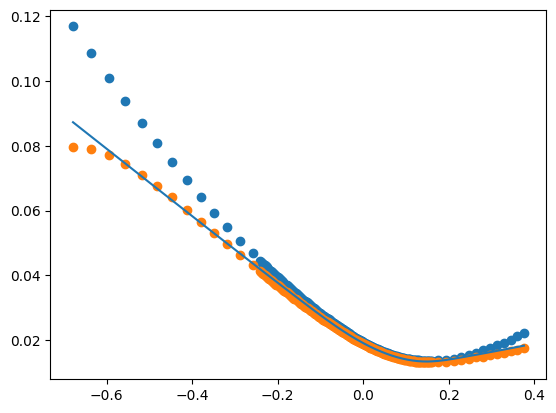

In [248]:
plt.plot(log_strikes, [w_40(i) for i in log_strikes])
plt.scatter(log_strikes, his)
plt.scatter(log_strikes, lows)
print(log_strikes_40.shape, log_strikes.shape)
print(sum([max(abs(w_40(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100 / log_strikes.shape[0]) 
print(np.sqrt(sum([(max(abs(w_40(log_strikes[i]).item() - mids[i]) - abs(his[i] - lows[i])/2, torch.tensor(0)).item() / mids[i])**2 for i in range(log_strikes.shape[0])])/ log_strikes.shape[0])* 100) 
print(max([max(abs(w_40(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100) # Max 


0.4246575342465753
tensor([-0.2139, -0.1949, -0.1763, -0.1632, -0.1529, -0.1326, -0.1151, -0.1028,
        -0.0882, -0.0834, -0.0810, -0.0786, -0.0715, -0.0597, -0.0574, -0.0504,
        -0.0481, -0.0320, -0.0252, -0.0229, -0.0162, -0.0072, -0.0050, -0.0006,
         0.0038,  0.0060,  0.0191,  0.0277,  0.0298,  0.0320,  0.0341,  0.0362,
         0.0384,  0.0405,  0.0426,  0.0468,  0.0489,  0.0594,  0.0615,  0.0635,
         0.0656,  0.0697,  0.0718,  0.0759,  0.0820,  0.0921,  0.1001,  0.1041,
         0.1081,  0.1120,  0.1218,  0.1238,  0.1257,  0.1316,  0.1393,  0.1431,
         0.1469,  0.1545,  0.1583,  0.1602,  0.2465])
(61,)
(61,)
Mid shape (61,)
9.00380559592238e-05
(61,) (61,)
torch.Size([61]) torch.Size([186, 1])
torch.Size([1, 186])
0.0 0.0 nan
Epoch: 0
Arb loss 0.0
Real arb loss 0.0
Bounds loss: 1.4013200982822088e-05
MAPE:  0.0
Delta:  0.08911612168155852
Breaking and plotting at epoch 0 with bounds loss tensor(1.4013e-05, grad_fn=<MulBackward0>) and arb loss tensor(0., gra

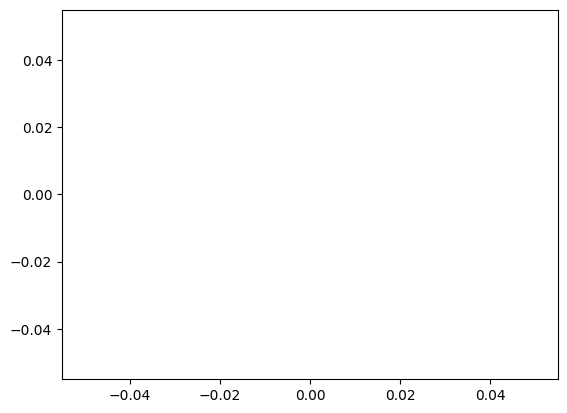

In [188]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed_30['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
processed_30 = remove(processed, 0.70, F)
log_strikes_30 = torch.tensor((processed_30['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes_30)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his_30, lows_30 = svi_with_noise(log_strikes_30, *params)
# mids_30 = torch.tensor(his_30 + lows_30) / 2
# mids_30 = mids_30 * T
his_30 = processed_30['vol_high'].to_numpy() ** 2 * T.item()
lows_30 = processed_30['vol_low'].to_numpy() ** 2 * T.item()
# mids_30 = torch.tensor(((processed_30['vol_high'].to_numpy() + processed_30['vol_low'].to_numpy()) / 2))
mids_30 = (his_30 + lows_30) / 2
print(mids_30.shape)
mids_30 = mids_30
print(mids_30.shape)
print('Mid shape', mids_30.shape)
# print(mids_30)
low = min(mids_30**2)/2
print(low)
print(his_30.shape, lows_30.shape)
# datum, log_strikes_30 = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes_30, mids_30, low)#, low)
datum = torch.tensor(np.vstack([ his_30.reshape(-1,1) , lows_30.reshape(-1,1) , log_strikes_30.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes_30.shape, datum.shape)
print(datum.T.shape)
w_30 = model.train(datum.T.double(), log_strikes_30, epochs=1601)



d:\Project\smilecorrector_gsvi_jo_mw_ar.py:680: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ctx.save_for_backward(coeffs, torch.tensor(x))
d:\Project\smilecorrector_gsvi_jo_mw_ar.py:684: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(poly(x))


torch.Size([61]) torch.Size([203])
0.1271842452150961
0.8179485337884845
7.743264025783439


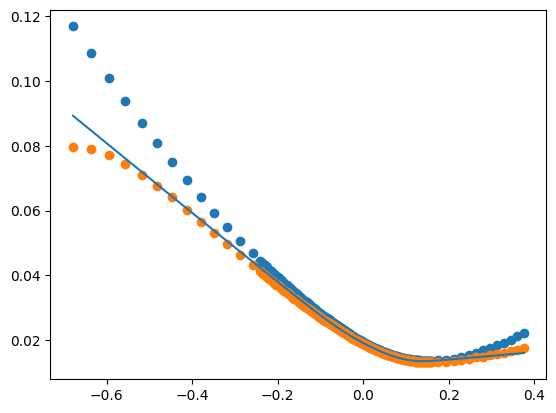

In [250]:

plt.plot(log_strikes, [w_30(i) for i in log_strikes])
plt.scatter(log_strikes, his)
plt.scatter(log_strikes, lows)
print(log_strikes_30.shape, log_strikes.shape)
print(sum([max(abs(w_30(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100 / log_strikes.shape[0]) 
print(np.sqrt(sum([(max(abs(w_30(log_strikes[i]).item() - mids[i]) - abs(his[i] - lows[i])/2, torch.tensor(0)).item() / mids[i])**2 for i in range(log_strikes.shape[0])])/ log_strikes.shape[0])* 100) 
print(max([max(abs(w_30(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100) # Max 


0.4246575342465753
tensor([-0.1225, -0.0644, -0.0504, -0.0366, -0.0274, -0.0184, -0.0139,  0.0104,
         0.0169,  0.0191,  0.0212,  0.0277,  0.0298,  0.0384,  0.0489,  0.0552,
         0.0594,  0.0615,  0.0635,  0.0718,  0.0840,  0.0860,  0.0981,  0.1001,
         0.1041,  0.1120,  0.1160,  0.1179,  0.1218,  0.1257,  0.1277,  0.1316,
         0.1335,  0.1450,  0.1469,  0.1488,  0.1583,  0.1602,  0.1751,  0.1934,
         0.2970])
(41,)
(41,)
Mid shape (41,)
9.00380559592238e-05
(41,) (41,)
torch.Size([41]) torch.Size([126, 1])
torch.Size([1, 126])


d:\Project\smilecorrector_gsvi_jo_mw_ar.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mids = torch.sqrt(torch.max(torch.tensor(mids**2 - low),torch.tensor(0)))
d:\Project\smilecorrector_gsvi_jo_mw_ar.py:292: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bounds = torch.hstack([torch.tensor(self.strike_low).reshape(1,1), knots, torch.tensor(self.strike_high).reshape(1,1)])
d:\Project\smilecorrector_gsvi_jo_mw_ar.py:680: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ctx.save_for_backward(coeffs, torch.tensor(x))
d:\Project\smilecorre

0.0 0 nan
Epoch: 0
Arb loss 0.0
Real arb loss 0.0
Bounds loss: 0.0
MAPE:  0.0
Delta:  0.011318680392430398
Breaking and plotting at epoch 0 with bounds loss tensor(0., grad_fn=<MulBackward0>) and arb loss tensor(0., grad_fn=<MulBackward0>)


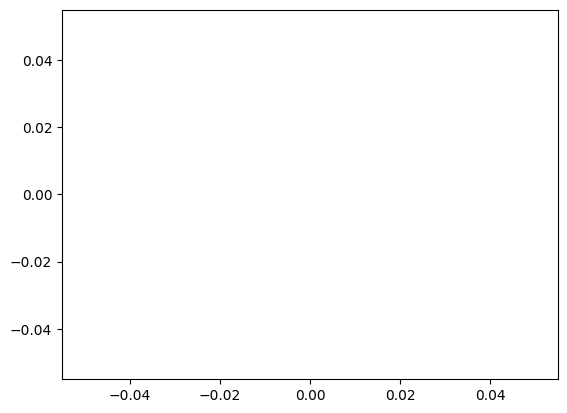

In [191]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed_20['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
processed_20 = remove(processed, 0.80, F)
log_strikes_20 = torch.tensor((processed_20['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes_20)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his_20, lows_20 = svi_with_noise(log_strikes_20, *params)
# mids_20 = torch.tensor(his_20 + lows_20) / 2
# mids_20 = mids_20 * T
his_20 = processed_20['vol_high'].to_numpy() ** 2 * T.item()
lows_20 = processed_20['vol_low'].to_numpy() ** 2 * T.item()
# mids_20 = torch.tensor(((processed_20['vol_high'].to_numpy() + processed_20['vol_low'].to_numpy()) / 2))
mids_20 = (his_20 + lows_20) / 2
print(mids_20.shape)
mids_20 = mids_20
print(mids_20.shape)
print('Mid shape', mids_20.shape)
# print(mids_20)
low = min(mids_20**2)/2
print(low)
print(his_20.shape, lows_20.shape)
# datum, log_strikes_20 = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes_20, mids_20, low)#, low)
datum = torch.tensor(np.vstack([ his_20.reshape(-1,1) , lows_20.reshape(-1,1) , log_strikes_20.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes_20.shape, datum.shape)
print(datum.T.shape)
w_20 = model.train(datum.T.double(), log_strikes_20, epochs=1601)



d:\Project\smilecorrector_gsvi_jo_mw_ar.py:680: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ctx.save_for_backward(coeffs, torch.tensor(x))
d:\Project\smilecorrector_gsvi_jo_mw_ar.py:684: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(poly(x))


1.3541312834700805
5.273254272963689
32.91751047728953


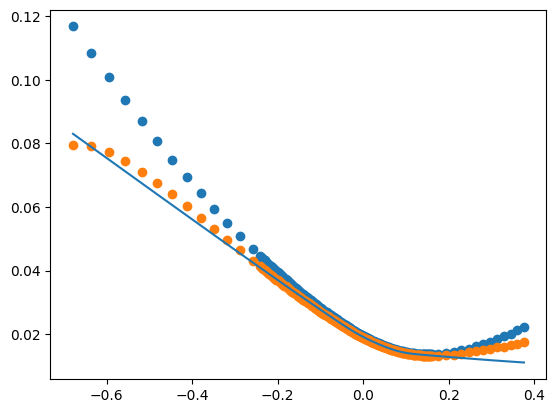

In [251]:
plt.plot(log_strikes, [w_20(i) for i in log_strikes])
plt.scatter(log_strikes, his)
plt.scatter(log_strikes, lows)
print(sum([max(abs(w_20(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100 / log_strikes.shape[0]) 
print(np.sqrt(sum([(max(abs(w_20(log_strikes[i]).item() - mids[i]) - abs(his[i] - lows[i])/2, torch.tensor(0)).item() / mids[i])**2 for i in range(log_strikes.shape[0])])/ log_strikes.shape[0])* 100) 
print(max([max(abs(w_20(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100) # Max 


0.4246575342465753
tensor([-0.0252, -0.0207, -0.0028,  0.0016,  0.0341,  0.0362,  0.0552,  0.0573,
         0.0594,  0.0677,  0.0697,  0.0779,  0.0860,  0.0881,  0.0941,  0.0981,
         0.1120,  0.1238,  0.1257,  0.1393,  0.1583])
(21,)
(21,)
Mid shape (21,)
9.020765539315359e-05
(21,) (21,)
torch.Size([21]) torch.Size([66, 1])
torch.Size([1, 66])
0.0 0 nan
Epoch: 0
Arb loss 0.0
Real arb loss 0.0
Bounds loss: 0.0
MAPE:  0.0
Delta:  0.25479369936968127
Breaking and plotting at epoch 0 with bounds loss tensor(0., grad_fn=<MulBackward0>) and arb loss tensor(0., grad_fn=<MulBackward0>)


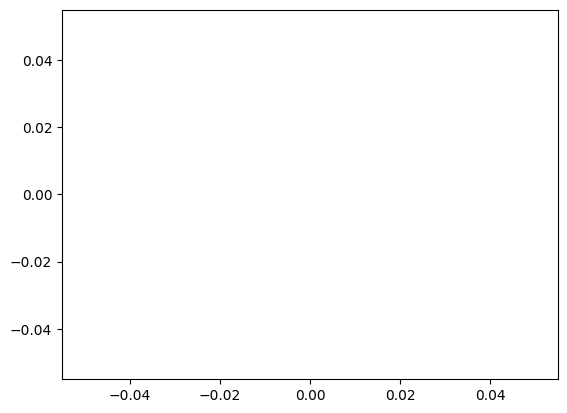

In [201]:
import smilecorrector_gsvi_jo_mw_ar as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed_10['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
R = 0.0056 # Rate for > 122 day
F = 2266.349134 # for ID 102434, Exp date 05/31/2022
T = 5 * 31 / 365
S = F * np.exp(-R * T)
print(T)
processed_10 = remove(processed, 0.90, F)
log_strikes_10 = torch.tensor((processed_10['strike_price'].apply(np.log).to_numpy()- np.log(F))) #   
print(log_strikes_10)
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
params = (0, 0.4, -0.6, 0, 0.2)
# his_10, lows_10 = svi_with_noise(log_strikes_10, *params)
# mids_10 = torch.tensor(his_10 + lows_10) / 2
# mids_10 = mids_10 * T
his_10 = processed_10['vol_high'].to_numpy() ** 2 * T.item()
lows_10 = processed_10['vol_low'].to_numpy() ** 2 * T.item()
# mids_10 = torch.tensor(((processed_10['vol_high'].to_numpy() + processed_10['vol_low'].to_numpy()) / 2))
mids_10 = (his_10 + lows_10) / 2
print(mids_10.shape)
mids_10 = mids_10
print(mids_10.shape)
print('Mid shape', mids_10.shape)
# print(mids_10)
low = min(mids_10**2)/2
print(low)
print(his_10.shape, lows_10.shape)
# datum, log_strikes_10 = pipeline.get_datum('2022-0') 
model = smilenet.SmileNet(5, log_strikes_10, mids_10, low)#, low)
datum = torch.tensor(np.vstack([ his_10.reshape(-1,1) , lows_10.reshape(-1,1) , log_strikes_10.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes_10.shape, datum.shape)
print(datum.T.shape)
w_10 = model.train(datum.T.double(), log_strikes_10, epochs=1601)




d:\Project\smilecorrector_gsvi_jo_mw_ar.py:680: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ctx.save_for_backward(coeffs, torch.tensor(x))
d:\Project\smilecorrector_gsvi_jo_mw_ar.py:684: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(poly(x))


3.733797714832666
7.115680075309731
33.01094738761736


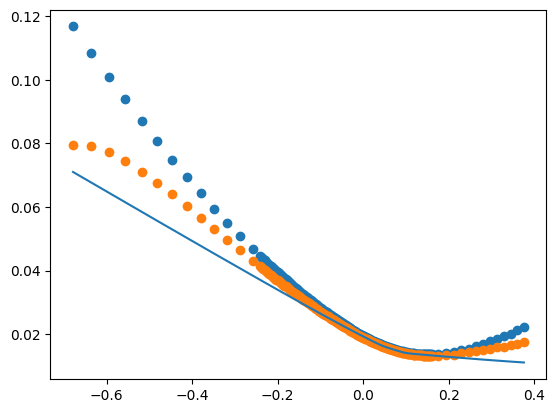

In [252]:
plt.plot(log_strikes, [w_10(i) for i in log_strikes])
plt.scatter(log_strikes, his)
plt.scatter(log_strikes, lows)
print(sum([max(abs(w_10(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100 / log_strikes.shape[0]) 
print(np.sqrt(sum([(max(abs(w_10(log_strikes[i]).item() - mids[i]) - abs(his[i] - lows[i])/2, torch.tensor(0)).item() / mids[i])**2 for i in range(log_strikes.shape[0])])/ log_strikes.shape[0])* 100) 
print(max([max(abs(w_10(log_strikes[i]) - mids[i]) - abs(his[i] - lows[i])/2, 0) / mids[i] for i in range(log_strikes.shape[0])]).item() * 100) # Max 


In [ ]:

norm = smilenet.differentiableNormCdf.apply

def d_plus(k, w):
    return -k / torch.sqrt(w(k)) + torch.sqrt(w(k)) / 2
def d_sub(k,w):
    return -k / torch.sqrt(w(k)) - torch.sqrt(w(k)) / 2


def bsc_svi(k, w, S):
    return S * (norm(d_plus(k, w)) - torch.exp(kreal) * norm(d_sub(k, w)))

In [ ]:
from functools import partial
pred, boundaries, low, knots = model.forward(datum.T.double())
ttensor = smilenet.transform(pred.detach(),1.0)
polys = [np.polynomial.polynomial.Polynomial(torch.flip((pred[:,0][4*i:4*i+4]), dims=(0,)).detach().numpy()) for i in range((pred.shape[0])//4)]
ts = [np.polynomial.polynomial.Polynomial(ttensor[i,:]) for i in range(ttensor.shape[0])]

funcs = [partial(bsc_svi, w = polys[i], S=S) for i in range(len(polys))]

boundaries = torch.hstack([torch.tensor(log_strikes[0]), boundaries.reshape(-1), torch.tensor(log_strikes[-1])])
his = torch.tensor(his).reshape(-1)
los = torch.tensor(los).reshape(-1)
print(los[0], log_strikes[0], mids[0])
print(type(mids), type(his))
ppm = [bsc_svi(log_strikes[i], lambda k, const=mids[i]: const, S) for i in range(log_strikes.reshape(-1).shape[0])]
pph = [bsc_svi(log_strikes[i], lambda k, const=his[i]: const, S) for i in range(log_strikes.reshape(-1).shape[0])]
ppl = [bsc_svi(log_strikes[i], lambda k, const=los[i]: const, S) for i in range(log_strikes.reshape(-1).shape[0])]


print(boundaries.shape)

smilenet.plot_polys(funcs, boundaries, 0, 'bs', extra_points=[(log_strikes, processed['best_offer'].to_numpy(), 'raw low'), (log_strikes, processed['best_bid'].to_numpy(), 'raw high'), (log_strikes, ppm, 'calc mid'), (log_strikes, pph, 'calc hi'),(log_strikes, ppl, 'calc lo')], labels=True)


ValueError: too many values to unpack (expected 2)

In [ ]:
# Play with SmileCorrect
import smilecorrector as sc
importlib.reload(sc)
control = torch.tensor(model.translate @ model.xstar).reshape(1,-1).double()
# control = torch.zeros(control.shape)
control.requires_grad_()
translate = model.translate

boundaries = model.boundaries
print(model.boundaries.shape, res1.shape)
sol, loss = sc.remove_arb(control, translate, boundaries)
print(control.shape)
print(sol.shape)
print('Loss of', loss)
loss2 = torch.sum(torch.abs(sol))
print("l1 of", loss2)

print(torch.autograd.grad(loss2, control))
polys = [np.polynomial.polynomial.Polynomial(list(reversed(sol[:,0].detach().numpy()[4*i:4*i+4]))) for i in range((sol.shape[0])//4)]
sc.plot_polys(polys, boundaries, 0, 'test')


C:\Users\User\AppData\Local\Temp\ipykernel_5392\2442275951.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  control = torch.tensor(model.translate @ model.xstar).reshape(1,-1).double()


(42,) torch.Size([164])
With remaining arb: 4.336808689942018e-11


ValueError: too many values to unpack (expected 2)

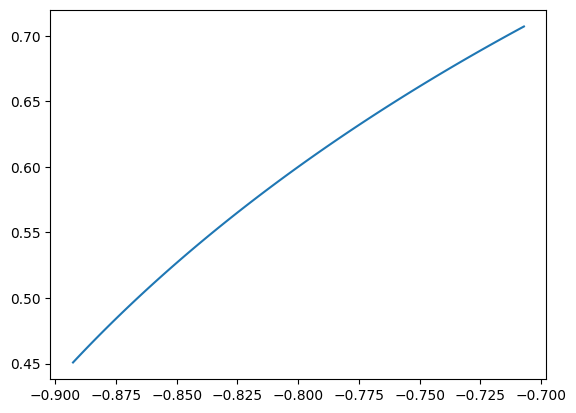

In [ ]:
import matplotlib.pyplot as plt
import torch 

a = torch.tensor([[1,2]]).T.double()
xs = []
ys = []
for i in range(100):
    a[0,0] = a[0,0] + 0.01
    q, r = torch.linalg.qr(a, mode='complete')
    xs += [q[0,1]]
    ys += [q[1,1]]
plt.plot(xs, ys)

In [ ]:
xs = torch.normal(0, torch.ones(3,1))
xs = (xs / xs.norm(dim=0)).T
print(xs.shape)
for i in xs:
    print("(%s, %s, %s)" % (i[0].item(), i[1].item(), i[2].item()))
    print(torch.linalg.norm(i))

print(xs)

torch.Size([1, 3])
(-0.8903900384902954, -0.358125239610672, -0.2809835374355316)
tensor(1.0000)
tensor([[-0.8904, -0.3581, -0.2810]])


In [ ]:
v = torch.tensor((0.3009892404079437, 0.02299308031797409, -0.9533502459526062))

In [ ]:
Q, _ = torch.linalg.qr(torch.tensor([[1,-1,0],[0,1,-1]]).T.double())

In [ ]:
print(Q)

tensor([[-0.7071, -0.4082],
        [ 0.7071, -0.4082],
        [-0.0000,  0.8165]], dtype=torch.float64)


In [ ]:
v = torch.tensor([[1,0.5,2.0],[2,3,1]]).T.double()
print(v - Q @ (Q.T @ v))

tensor([[1.1667, 2.0000],
        [1.1667, 2.0000],
        [1.1667, 2.0000]], dtype=torch.float64)
